# Beam comparison Bessel & Gaussian
## Results varying within a parameter grid
 - Fis. Bio. Ángel Andrés Moreno Sánchez
 - PhD. Karen Volke Sepúlveda

In [1]:
# Import libraries
import numpy as np
import scipy as sc
from scipy import integrate
import matplotlib.pyplot as plt
import math as m
from tqdm import tqdm
import time
import matplotlib as mpl  
mpl.rc('font',family='Times New Roman')
#plt.style.use('dark_background')
import json

# Import custom functions
from optic_simulations import optic_forces, plot_forces
from rtx_model import OpticRTX 
from optic_integrands import *

## Similar waist size comparison

### Particle radius 10 

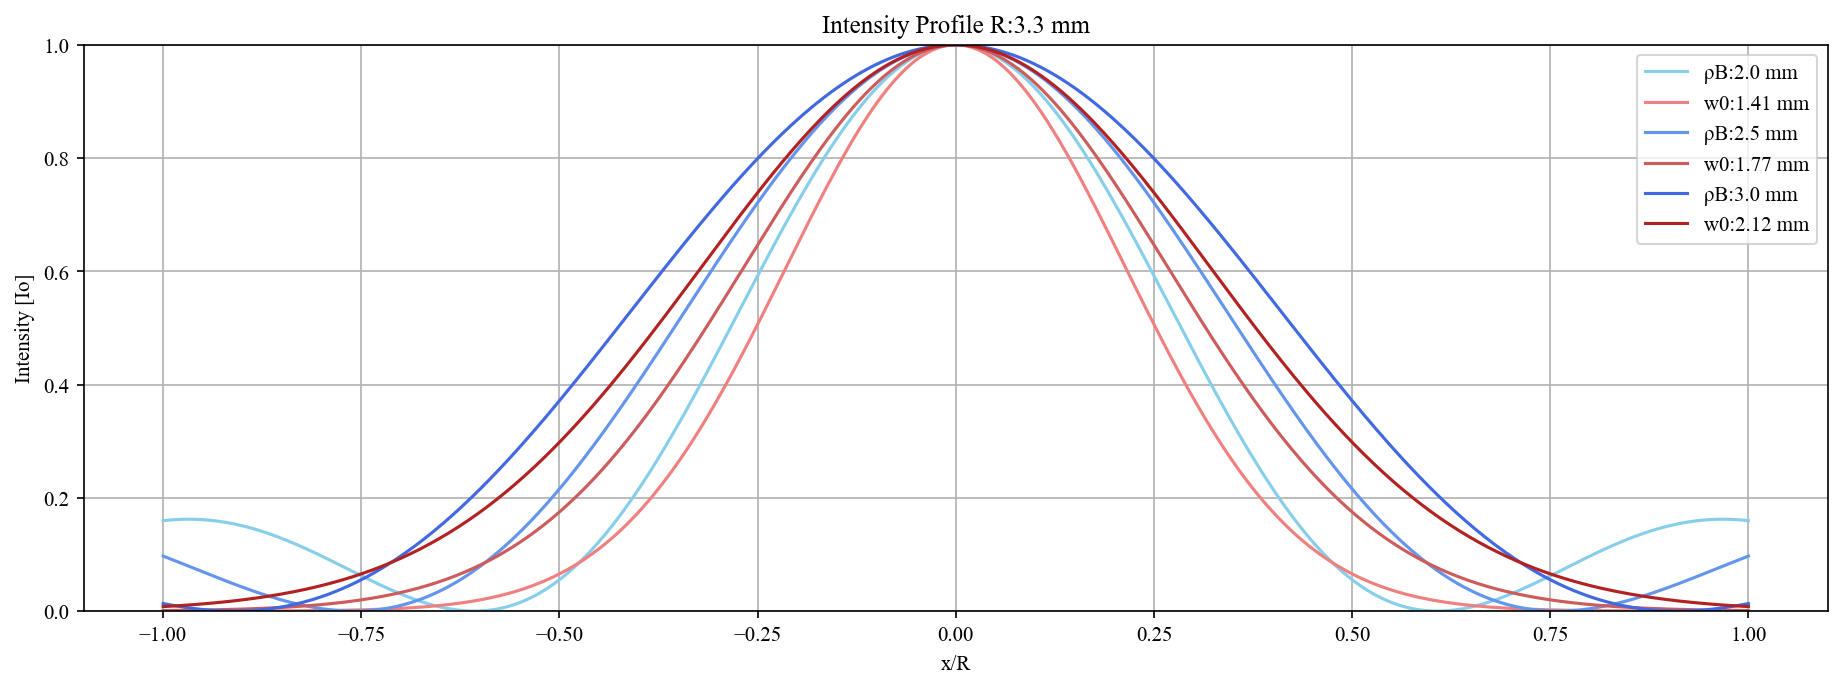

In [5]:
R = 3.3e-3
rho_B = np.arange(2,3.5,0.5)*1e-3
plt.rcParams['figure.figsize'] = (15, 5)
plt.rcParams['figure.dpi'] = (150)
rho = np.linspace(-R,R,500)
gauss_c = ['lightcoral','indianred','firebrick']
bess_c = ['skyblue','cornflowerblue','royalblue']
for j in range(len(rho_B)):
    w0 = (rho_B[j]/2)*np.sqrt(2)
    bessel = Bessel(rho,rho_B[j])**2
    gauss = Gaussian(rho,w0/2)
    plt.plot(rho/R,bessel,label='ρB:{} mm'.format(round(rho_B[j]*1e3,2)),color=bess_c[j])
    plt.plot(rho/R,gauss,label='w0:{} mm'.format(round(w0*1e3,2)),color=gauss_c[j])
    plt.legend(loc='upper right')       
    plt.title(f'Intensity Profile R:{R*1e3} mm')
    plt.xlabel('x/R')
    plt.ylabel('Intensity [Io]')
    plt.grid()
    plt.ylim((0,1))
plt.show()

In [5]:
# Basic parameter definition
a = 10e-6
R = 3.3e-3
PL = 100e-3
W_B_1 = 3.5e-3
W_B_2 = 2.5e-3
W_G_1 = (W_B_1/2)*np.sqrt(2)

# Coordinate parameters
n = 10    #no. of particle radius moved
# Initial and final coordinates for longitudinal movement
r_i_z = [0,0,-n*a]
r_f_z = [0,0,n*a]
# Initial and final coordinates for transversal movement
r_i_x = [-n*a,0,0]
r_f_x = [n*a,0,0]

# Models creations
bessel_3_5 = OpticRTX('waist',structure='Bessel' ,R=R,a=a,PL=PL, W=W_B_1)
bessel_2_0 = OpticRTX('waist',structure='Bessel' ,R=R,a=a,PL=PL, W=W_B_2)
gauss_3_5 = OpticRTX('waist',structure='Gaussian' ,R=R,a=a,PL=PL, W=W_G_1)

RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Gaussian_aberration-False


In [6]:
bessel_2_0.param

{'a': 1e-05,
 'NA': 1.25,
 'R': 0.0033,
 'n_o': 1.51,
 'material': 'glass',
 'medium': 'water',
 'lambda': 532,
 'W': 0.0025,
 'PL': 0.1,
 'n_points': 500,
 'n_t': 1.5,
 'n_i': 1.333,
 'f': 0.003986399999999999,
 'theta_crit': 0.9752008276496525}

In [7]:
bessel_3_5.param

{'a': 1e-05,
 'NA': 1.25,
 'R': 0.0033,
 'n_o': 1.51,
 'material': 'glass',
 'medium': 'water',
 'lambda': 532,
 'W': 0.0035,
 'PL': 0.1,
 'n_points': 500,
 'n_t': 1.5,
 'n_i': 1.333,
 'f': 0.003986399999999999,
 'theta_crit': 0.9752008276496525}

In [8]:
gauss_3_5.param

{'a': 1e-05,
 'NA': 1.25,
 'R': 0.0033,
 'n_o': 1.51,
 'material': 'glass',
 'medium': 'water',
 'lambda': 532,
 'W': 0.0024748737341529167,
 'PL': 0.1,
 'n_points': 500,
 'n_t': 1.5,
 'n_i': 1.333,
 'f': 0.003986399999999999,
 'theta_crit': 0.9752008276496525}

In [9]:
bessel_3_5_res = bessel_3_5.optic_forces(r_i_z,r_f_z,n_points=500)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [07:10<00:00,  1.16it/s]


In [10]:
bessel_2_0_res = bessel_2_0.optic_forces(r_i_z,r_f_z,n_points=500)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [07:12<00:00,  1.16it/s]


In [11]:
gauss_3_5_res = gauss_3_5.optic_forces(r_i_z,r_f_z,n_points=500)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [09:20<00:00,  1.12s/it]


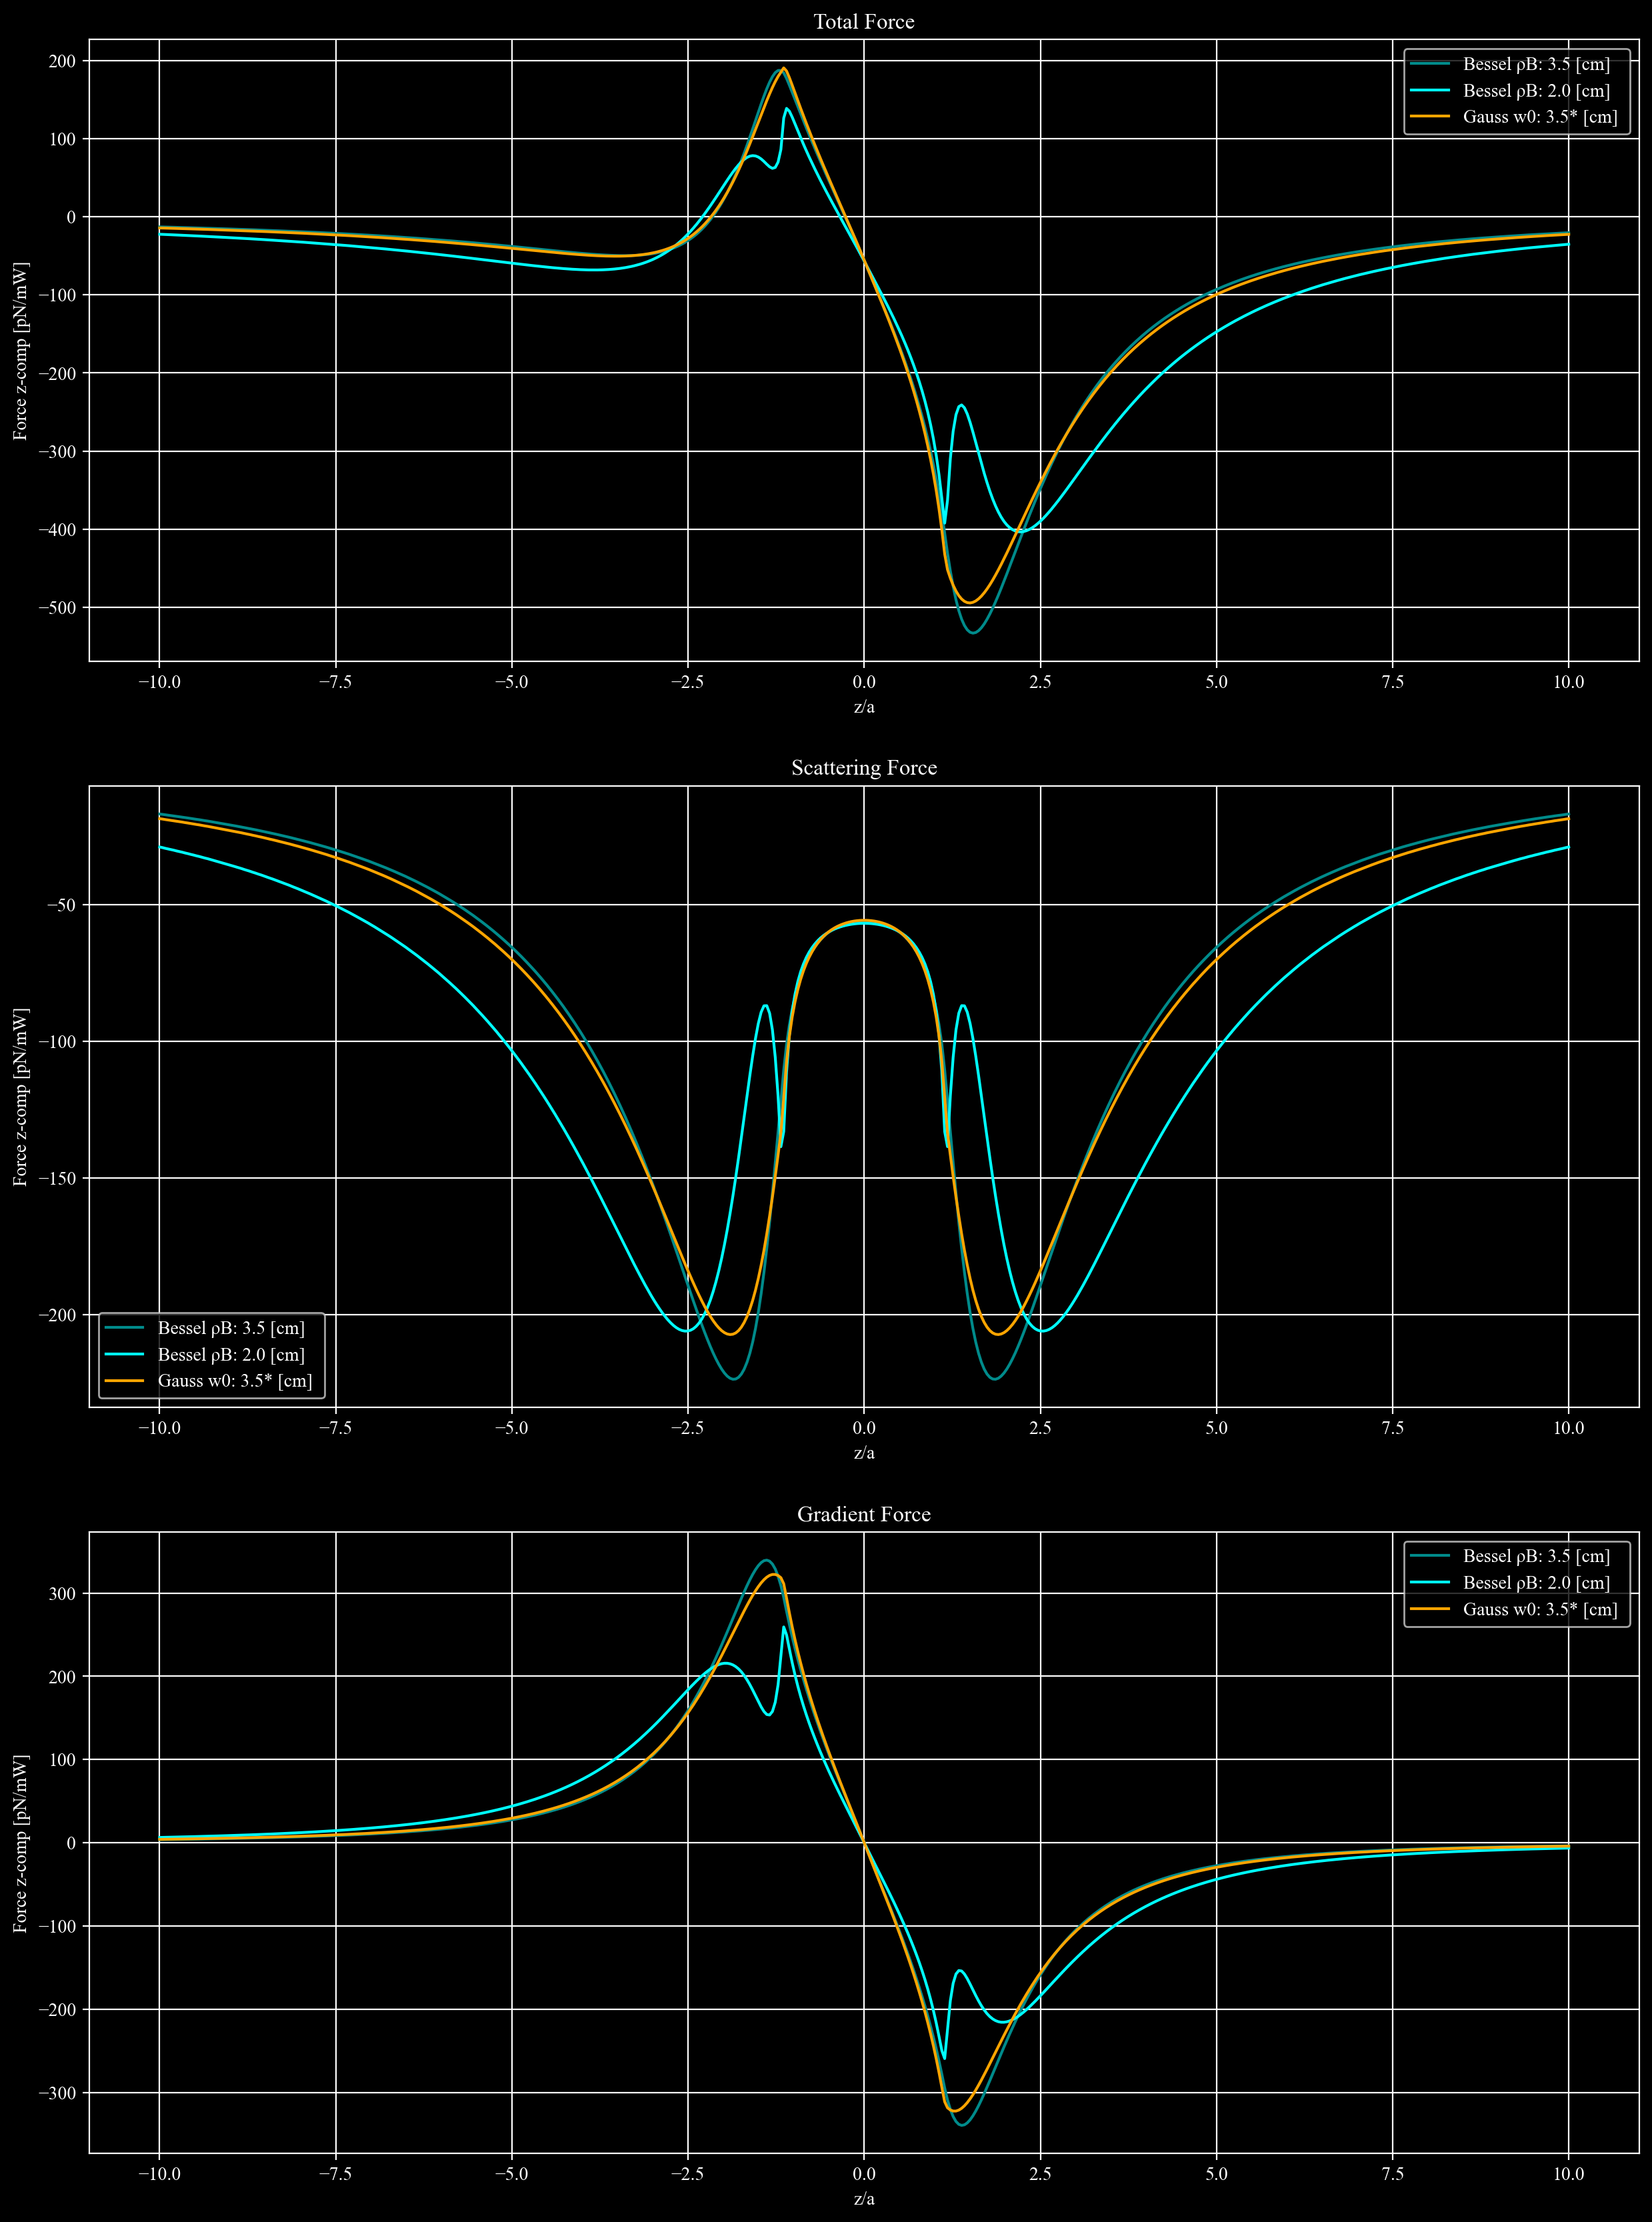

In [13]:
%matplotlib inline
x = bessel_3_5_res['positions']['z']
plt.style.use('dark_background')
plt.rcParams['figure.dpi'] = (200)
fig,ax = plt.subplots(3,1,figsize=(15,21))
forces = ['total','grad','scatt']
experiments = {'Bessel ρB: 3.5':bessel_3_5_res,'Bessel ρB: 2.0':bessel_2_0_res, 'Gauss w0: 3.5*':gauss_3_5_res}
lines = '-'
colors = ['darkcyan','cyan','orange']
i = 0
for experiment,result in experiments.items():
    power = result['parameters']['PL'] 
    y_t = result['results'][forces[0]][1]
    y_g = result['results'][forces[1]][1]
    y_s = result['results'][forces[2]][1]
    label = experiment+' [cm] '
    ax[0].plot(x/a,y_t*1e12/power,ls=lines, label= label,c=colors[i])
    ax[0].legend()
    ax[0].set_title('Total Force')
    ax[0].set_xlabel('z/a')
    ax[0].set_ylabel('Force z-comp [pN/mW]')
    ax[0].grid()
    
    ax[1].plot(x/a,y_s*1e12/power,ls=lines, label= label,c=colors[i])
    ax[1].legend()
    ax[1].set_title('Scattering Force')
    ax[1].set_xlabel('z/a')
    ax[1].set_ylabel('Force z-comp [pN/mW]')
    ax[1].grid()

    ax[2].plot(x/a,y_g*1e12/power,ls=lines, label= label,c=colors[i])
    ax[2].legend()
    ax[2].set_title('Gradient Force')
    ax[2].set_xlabel('z/a')
    ax[2].set_ylabel('Force z-comp [pN/mW]')
    ax[2].grid()
    i+=1
plt.show()

## Multiple $\rho_B$ for a Bessel beam compared to a Gaussian 

In [13]:
# Basic parameter definition
a = 25e-6
R = 3.3e-3
PL = 100e-3
W_B_1 = 3.3e-3
W_G_1 = (W_B_1/2)*np.sqrt(2)

# Models creations
bessel_rhoB = OpticRTX('waist',structure='Bessel' ,R=R,a=a,PL=PL, W=W_B_1)
gauss_w0 = OpticRTX('waist',structure='Gaussian' ,R=R,a=a,PL=PL, W=W_G_1)

RTXModel_structure-Bessel_aberration-False
RTXModel_structure-Gaussian_aberration-False


In [15]:
bessel_rhoB.param

{'a': 2.5e-05,
 'NA': 1.25,
 'R': 0.0033,
 'n_o': 1.51,
 'material': 'glass',
 'medium': 'water',
 'lambda': 532,
 'W': 0.0033,
 'PL': 0.1,
 'n_points': 500,
 'n_t': 1.5,
 'n_i': 1.333,
 'f': 0.003986399999999999,
 'theta_crit': 0.9752008276496525}

In [16]:
gauss_w0.param

{'a': 2.5e-05,
 'NA': 1.25,
 'R': 0.0033,
 'n_o': 1.51,
 'material': 'glass',
 'medium': 'water',
 'lambda': 532,
 'W': 0.002333452377915607,
 'PL': 0.1,
 'n_points': 500,
 'n_t': 1.5,
 'n_i': 1.333,
 'f': 0.003986399999999999,
 'theta_crit': 0.9752008276496525}

In [18]:
bessel_rhoB.simulation()

No. cores: 12
Creating job instances


Initial waist ? 0.5
Final waist ? 4
waist delta ? 0.5
How many radii should the particle move? 10
Where is the particle moving (x, z, xz) ? z
Start at z eq. (yes/no) ? no



Simulation started...
Selected parameters...
waist [0.5, 4.0] 
Moving along: z
Execute jobs
Working....
Done!
Simulation for waist: [0.0035, 0.003, 0.0025, 0.0015, 0.002, 0.001, 0.0005]
Saved as: waist_Bessel-simulations_m-z_p-(0.5,4.0)_eq-no.json


In [14]:
gauss_w0.simulation()

No. cores: 12
Creating job instances


Initial waist ? 2.5
Final waist ? 4
waist delta ? 0.5
How many radii should the particle move? 10
Where is the particle moving (x, z, xz) ? z
Start at z eq. (yes/no) ? no
Additional name for file (yes/no) ? yes
Additional name? base



Simulation started...
Selected parameters...
waist [2.5, 4.0] 
Moving along: z
Execute jobs
Working....
Done!
Simulation for waist: [0.0017677669529663688, 0.002121320343559643, 0.0024748737341529162]
Saved as: waist_Gaussian-simulations_m-z_p-(2.5,4.0)_eq-no_base.json


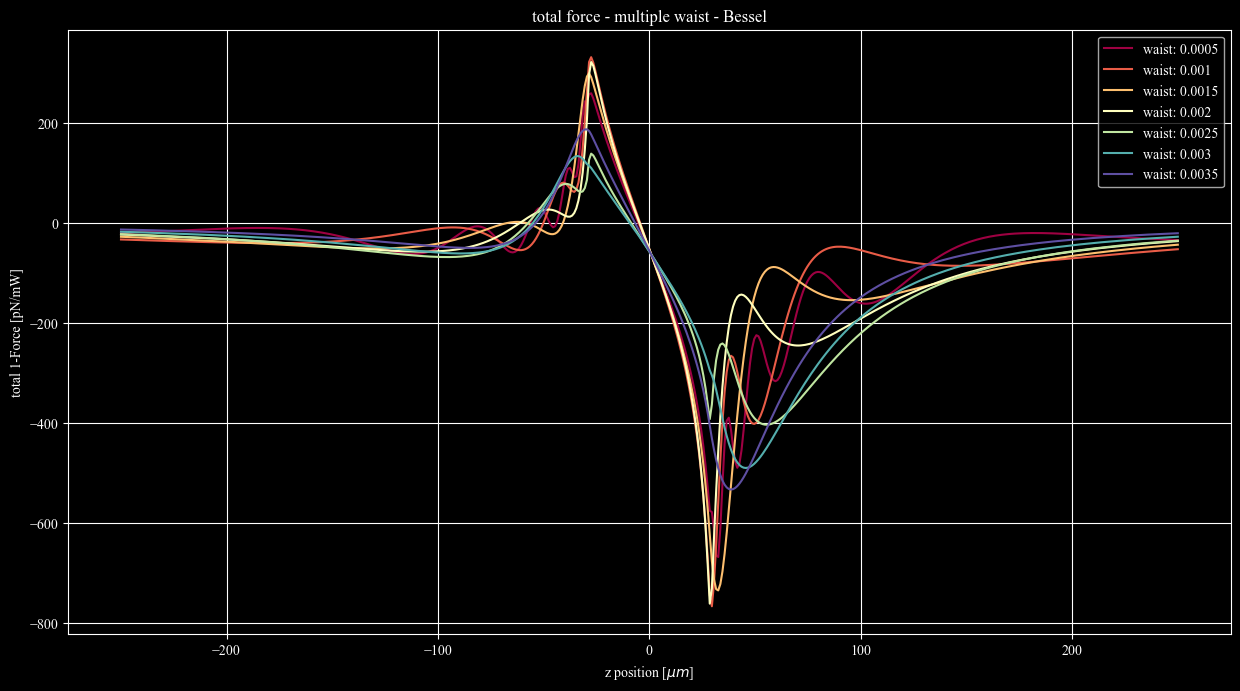

In [19]:
plt.rcParams['figure.dpi'] = (100)
# %matplotlib inline
bessel_rhoB.plot_simulation(orientation='up')

In [20]:
# %matplotlib inline
# bessel_rhoB.equilibrium()

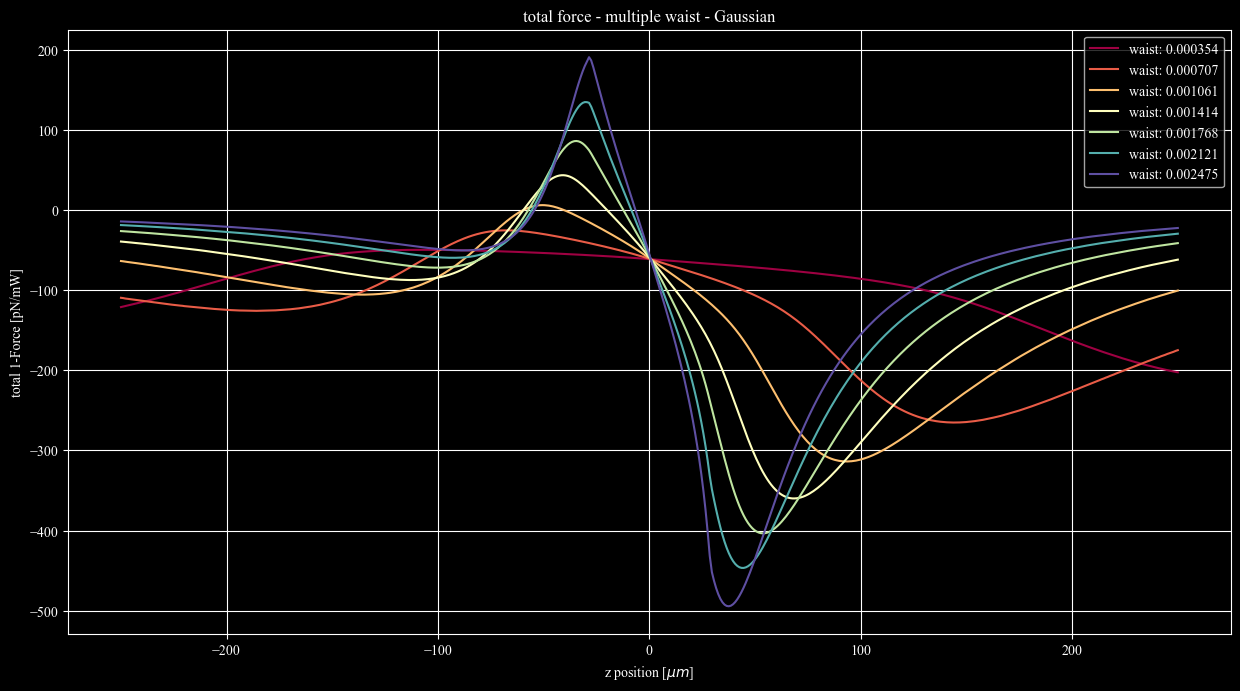

In [21]:
gauss_w0.plot_simulation(orientation='up')

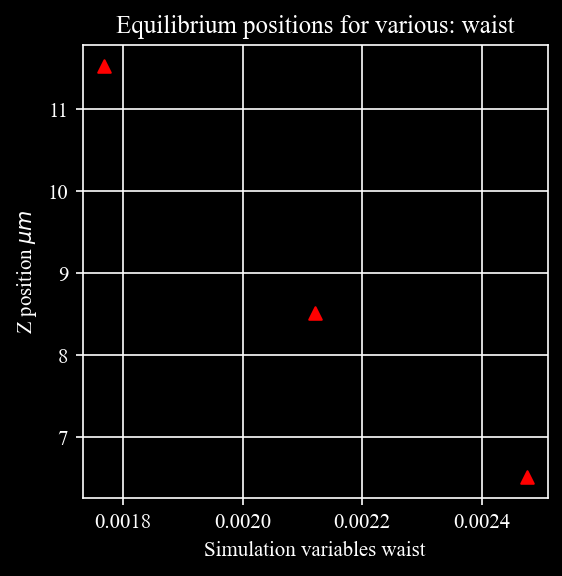

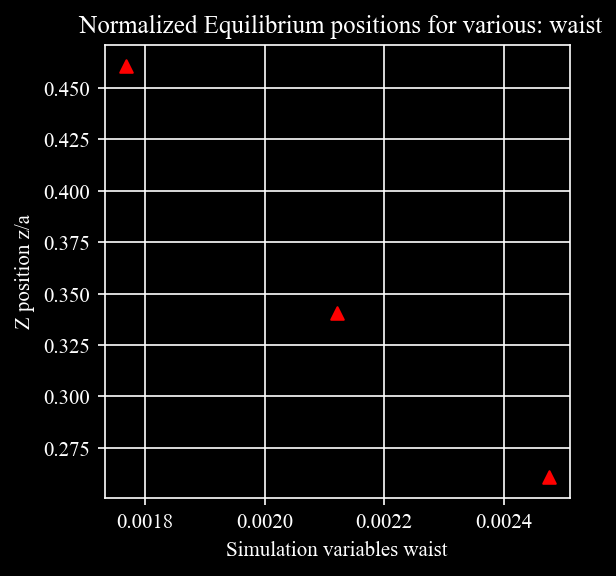

In [5]:
gauss_w0.equilibrium()

## Parameter grid

In order to explore the focused Bessel beam trap, a parameter grid is defined as follows:

  1. $a:$ $[2,10,25,50]$ $\mu m$
  2. $\rho_B:$ $[0.5,1,1.5,2.5,3,3.5]$ $cm$
  3. $w_0:$ $[0.5,1,1.5,2.5,3,3.5]/2\sqrt{2}$ $cm$
  4. NA: $[0.5,0.75,1,1.25]$
    
The methodology to evaluate the parameters will consist to compare particle radius against the beam waist and then numerical apperture against beam waist, as the beam waist is of particular interest. 

### 1.1 Gaussian: a & $w_0$

#### 1.1.1 a: 2 $\mu m$

In [3]:
# Basic parameter definition
a = 2e-6
R = 3.3e-3
PL = 100e-3
W_B_array = np.array([0.5,1.0,1.5,2.5,3.0,3.5])
W_G_array = W_B_array/(2*np.sqrt(2))

# Models creations
g_exp_1_1_1 = OpticRTX('waist',structure='Gaussian' ,R=R,a=a,PL=PL)

RTXModel_structure-Gaussian_aberration-False


In [4]:
g_exp_1_1_1.simulation()

No. cores: 12
Creating job instances


Initial waist ? 3
Final waist ? 4
waist delta ? 0.5
How many radii should the particle move? 10
Where is the particle moving (x, z, xz) ? z
Start at z eq. (yes/no) ? no
Additional name for file (yes/no) ? yes
Additional name? a-2



Simulation started...
Selected parameters...
waist [3.0, 4.0] 
Moving along: z
Execute jobs
Working....
Done!
Simulation for waist: [0.002121320343559643, 0.0024748737341529162]
Saved as: waist_Gaussian-simulations_m-z_p-(3.0,4.0)_eq-no_a-2.json


In [8]:
g_exp_1_1_1.plot_simulation(orientation='up')

A simulation was not generated, checking if loaded simulation exists
A simulation is needed it was neither generated or loaded, try generating a simulation or loading one.


#### 1.1.2 a: 10 $\mu m$

In [6]:
# Model creation
a = 10e-6
g_exp_1_1_2 = OpticRTX('waist',structure='Gaussian' ,R=R,a=a,PL=PL,n_points=250)

RTXModel_structure-Gaussian_aberration-False


In [7]:
g_exp_1_1_2.simulation()

No. cores: 12
Creating job instances


Initial waist ? 3
Final waist ? 4
waist delta ? 0.5
How many radii should the particle move? 10
Where is the particle moving (x, z, xz) ? z
Start at z eq. (yes/no) ? no
Additional name for file (yes/no) ? yes
Additional name? a-10



Simulation started...
Selected parameters...
waist [3.0, 4.0] 
Moving along: z
Execute jobs
Working....
Done!
Simulation for waist: [0.002121320343559643, 0.0024748737341529162]
Saved as: waist_Gaussian-simulations_m-z_p-(3.0,4.0)_eq-no_a-10.json


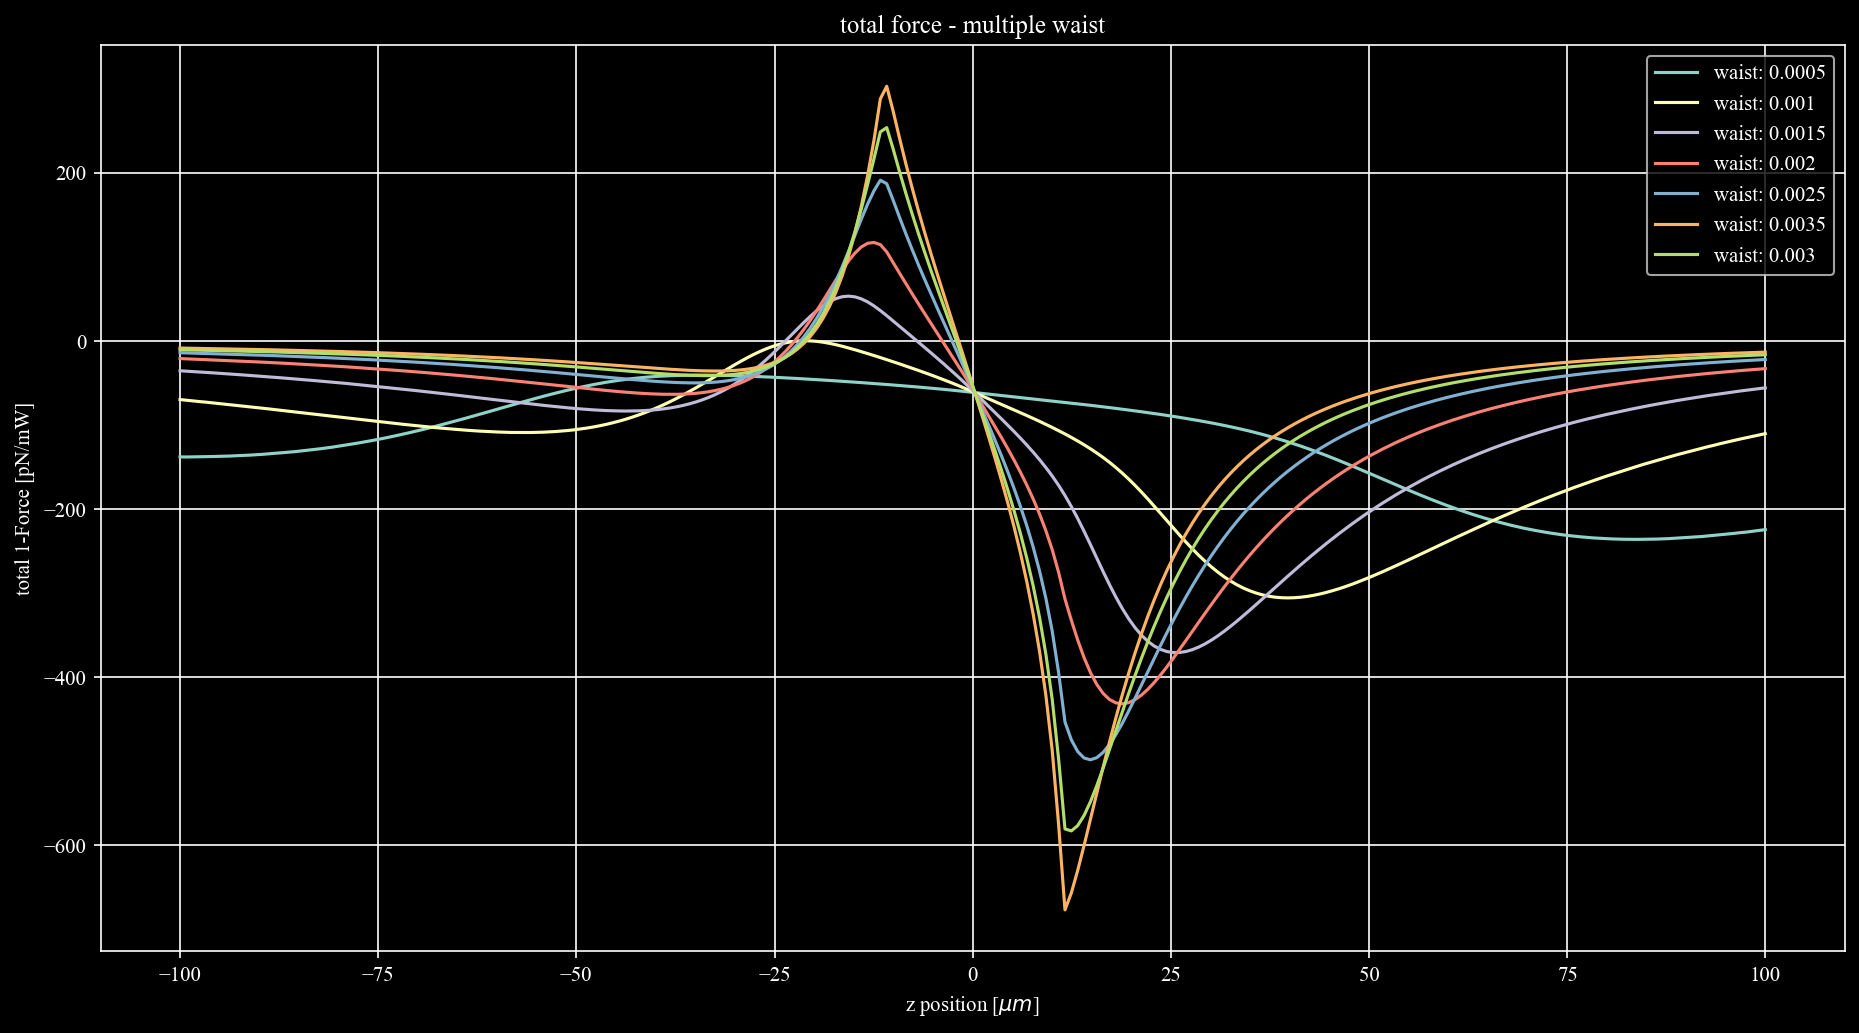

In [85]:
g_exp_1_1_2.plot_simulation(orientation='up')

#### 1.1.3 a: 25 $\mu m$

In [70]:
# Model creation
a = 25e-6
g_exp_1_1_3 = OpticRTX('waist',structure='Gaussian' ,R=R,a=a,PL=PL,n_points=250)

RTXModel_structure-Gaussian_aberration-False


In [71]:
g_exp_1_1_3.simulation()

No. cores: 12
Creating job instances
Initial waist ?0.5
Final waist ?4
waist delta ?0.5
How many radii should the particle move?10
Where is the particle moving (x, z, xz) ?z
Start at z eq. (yes/no) ?no

Simulation started...
Selected parameters...
waist [0.5, 4.0] 
Moving along: z
Execute jobs
Working....
Done!
Simulation for waist: [0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.0035, 0.003]
Saved as: waist_Gaussian-simulations_m-z_p-(0.5,4.0)_eq-no.json


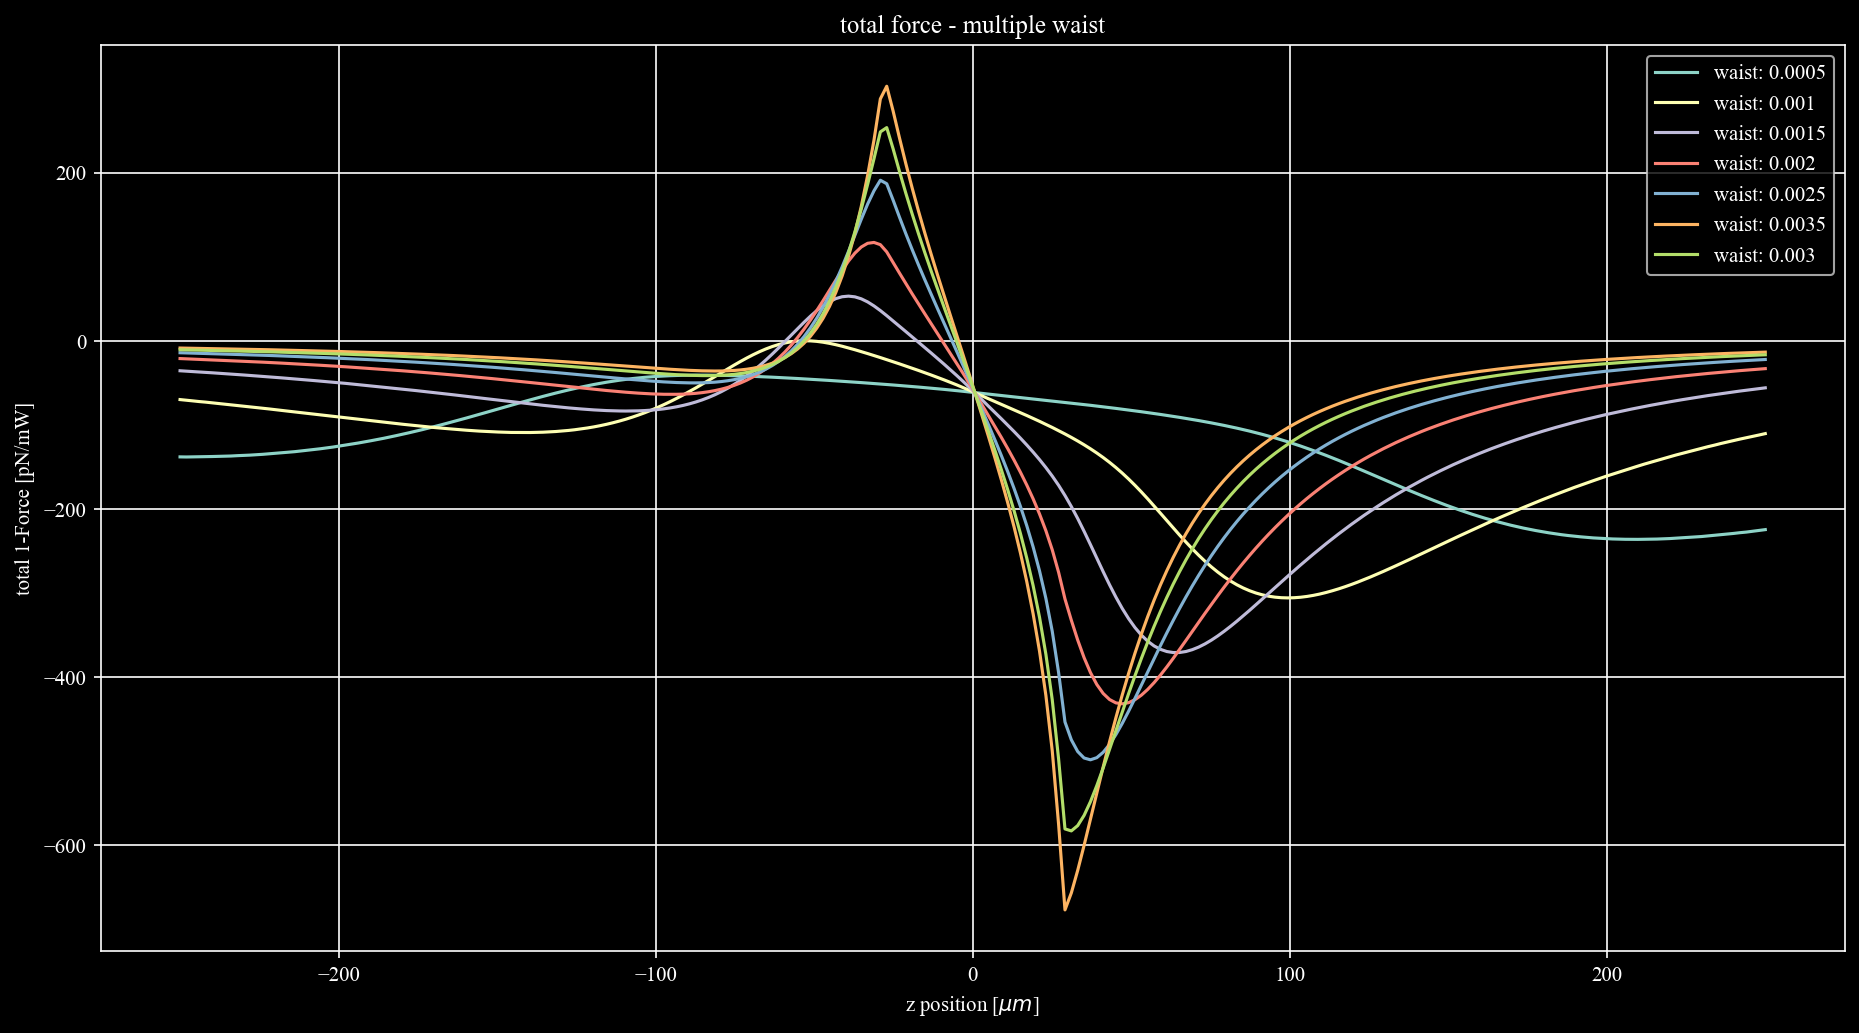

In [72]:
g_exp_1_1_3.plot_simulation(orientation='up')

#### 1.1.4 a: 50 $\mu m$

In [118]:
# Model creation
a = 50e-6
g_exp_1_1_4 = OpticRTX('waist',structure='Gaussian' ,R=R,a=a,PL=PL,n_points=250)

RTXModel_structure-Gaussian_aberration-False


In [119]:
g_exp_1_1_4.simulation()

No. cores: 12
Creating job instances
Initial waist ?1.5
Final waist ?5
waist delta ?0.5
How many radii should the particle move?10
Where is the particle moving (x, z, xz) ?z
Start at z eq. (yes/no) ?no

Simulation started...
Selected parameters...
waist [1.5, 5.0] 
Moving along: z
Execute jobs
Working....
Done!
Simulation for waist: [0.0015, 0.002, 0.003, 0.0025, 0.004, 0.0045000000000000005, 0.0035]
Saved as: waist_Gaussian-simulations_m-z_p-(1.5,5.0)_eq-no.json


In [146]:
g_exp_1_1_4.plot_simulation(orientation='up')

### 1.2 Bessel: a & $\rho_B$

#### 1.2.1 a: 2 $\mu m$

In [18]:
# Basic parameter definition
a = 2e-6
W_B_array = np.array([0.5,1.0,1.5,2.5,3.0,3.5])
W_G_array = W_B_array/(2*np.sqrt(2))
# Models creations
b_exp_1_1_1 = OpticRTX('waist',structure='Bessel' ,R=R,a=a,PL=PL, W=W_B_1)

RTXModel_structure-Bessel_aberration-False


In [19]:
b_exp_1_1_1.simulation()

No. cores: 12
Creating job instances


Initial waist ? 0.5
Final waist ? 4
waist delta ? 0.5
How many radii should the particle move? 10
Where is the particle moving (x, z, xz) ? z
Start at z eq. (yes/no) ? no
Additional name for file (yes/no) ? yes
Additional name? a-2



Simulation started...
Selected parameters...
waist [0.5, 4.0] 
Moving along: z
Execute jobs
Working....
Done!
Simulation for waist: [0.003, 0.0025, 0.001, 0.0015, 0.0035, 0.002, 0.0005]
Saved as: waist_Bessel-simulations_m-z_p-(0.5,4.0)_eq-no_a-2.json


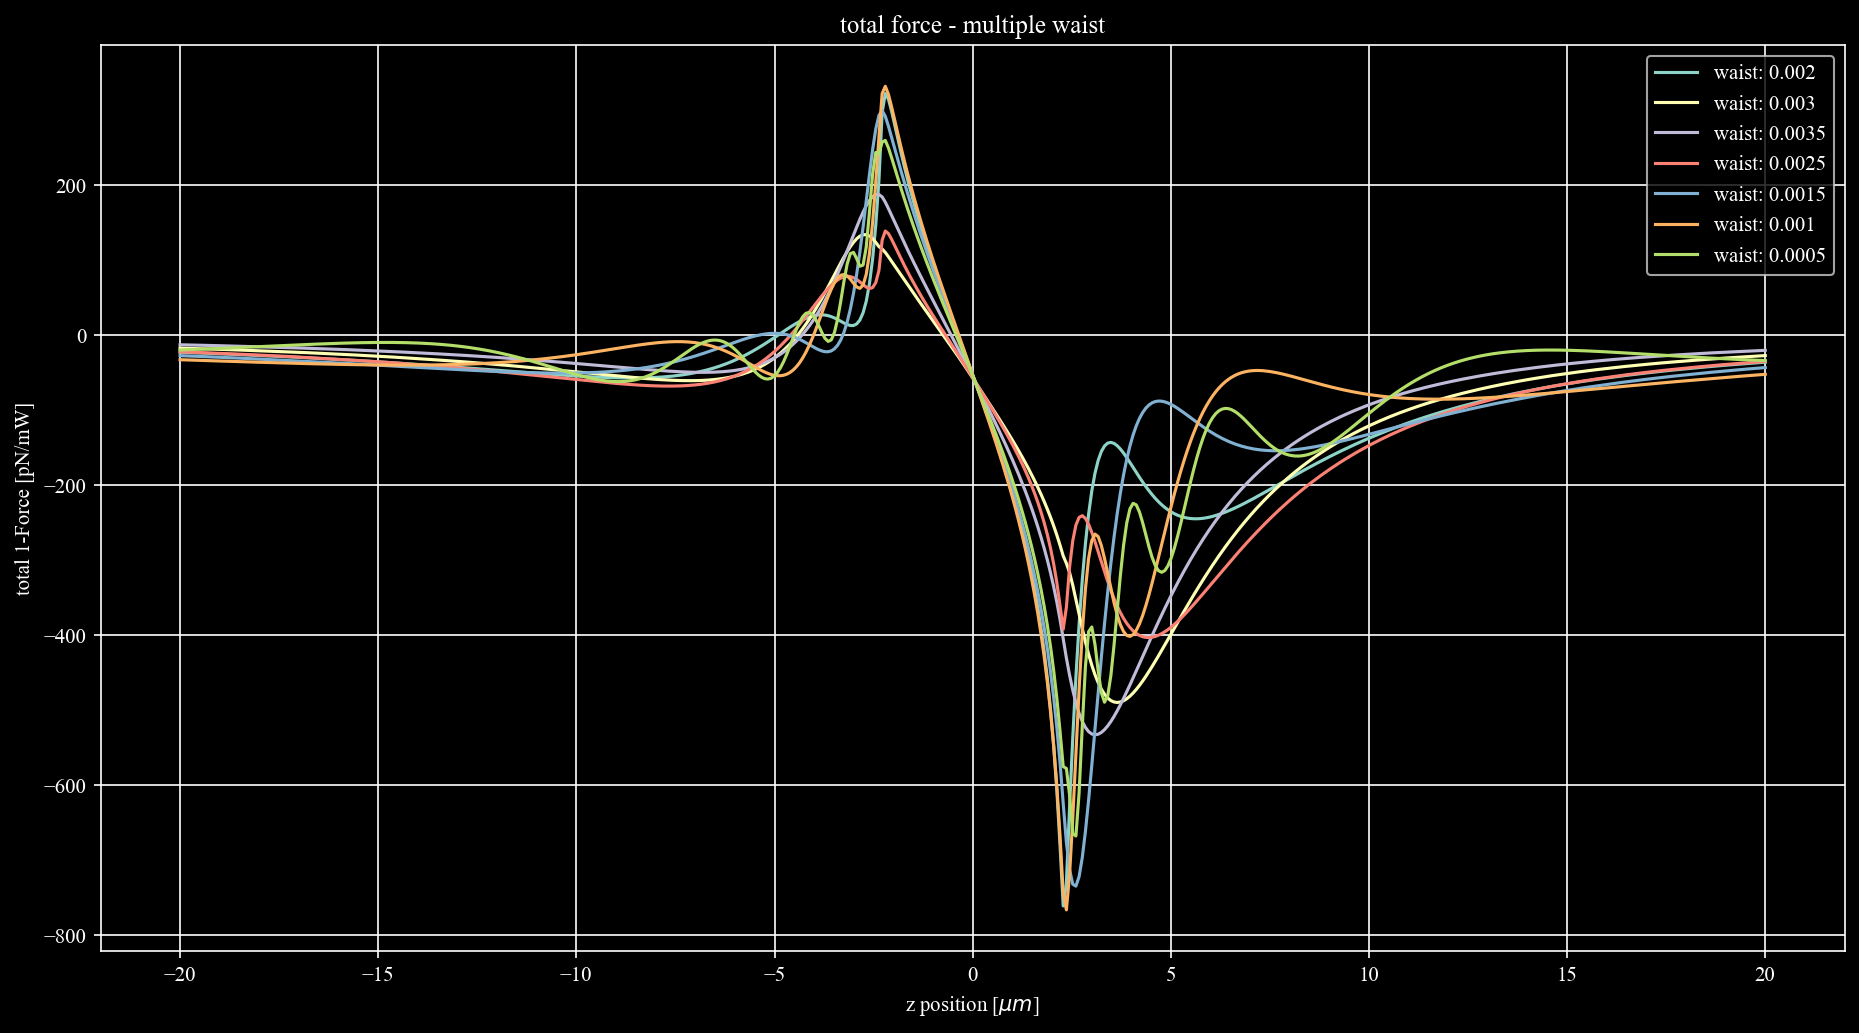

In [69]:
b_exp_1_1_1.plot_simulation(orientation='up')

#### 1.2.2 a: 10 $\mu m$

In [78]:
a = 10e-6
# Models creations
b_exp_1_1_2 = OpticRTX('waist',structure='Bessel' ,R=R,a=a,PL=PL, W=W_B_1,n_points=250)

RTXModel_structure-Bessel_aberration-False


In [79]:
b_exp_1_1_2.simulation()

No. cores: 12
Creating job instances
Initial waist ?2
Final waist ?4
waist delta ?0.2
How many radii should the particle move?10
Where is the particle moving (x, z, xz) ?z
Start at z eq. (yes/no) ?no

Simulation started...
Selected parameters...
waist [2.0, 4.0] 
Moving along: z
Execute jobs
Working....
Done!
Simulation for waist: [0.0038000000000000017, 0.0036000000000000016, 0.003200000000000001, 0.003400000000000001, 0.0026000000000000007, 0.002, 0.0024000000000000002, 0.0022, 0.003000000000000001, 0.002800000000000001]
Saved as: waist_Bessel-simulations_m-z_p-(2.0,4.0)_eq-no.json


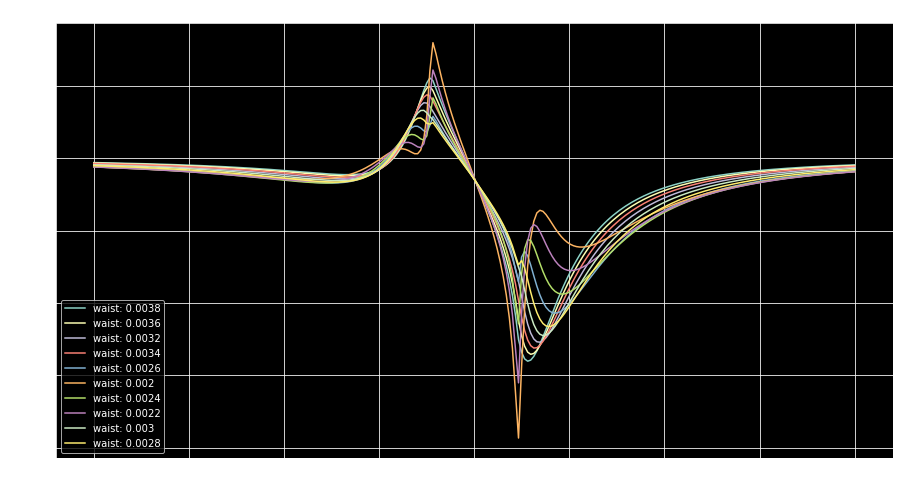

In [156]:
%matplotlib inline
b_exp_1_1_2.plot_simulation(orientation='up')
plt.grid()

#### 1.2.3 a: 25 $\mu m$

In [75]:
a = 25e-6
# Models creations
b_exp_1_1_3 = OpticRTX('waist',structure='Bessel' ,R=R,a=a,PL=PL, W=W_B_1,n_points=250)

RTXModel_structure-Bessel_aberration-False


In [76]:
b_exp_1_1_3.simulation()

No. cores: 12
Creating job instances
Initial waist ?0.5
Final waist ?4
waist delta ?0.5
How many radii should the particle move?10
Where is the particle moving (x, z, xz) ?z
Start at z eq. (yes/no) ?no

Simulation started...
Selected parameters...
waist [0.5, 4.0] 
Moving along: z
Execute jobs
Working....
Done!
Simulation for waist: [0.0035, 0.003, 0.0025, 0.002, 0.001, 0.0015, 0.0005]
Saved as: waist_Bessel-simulations_m-z_p-(0.5,4.0)_eq-no.json


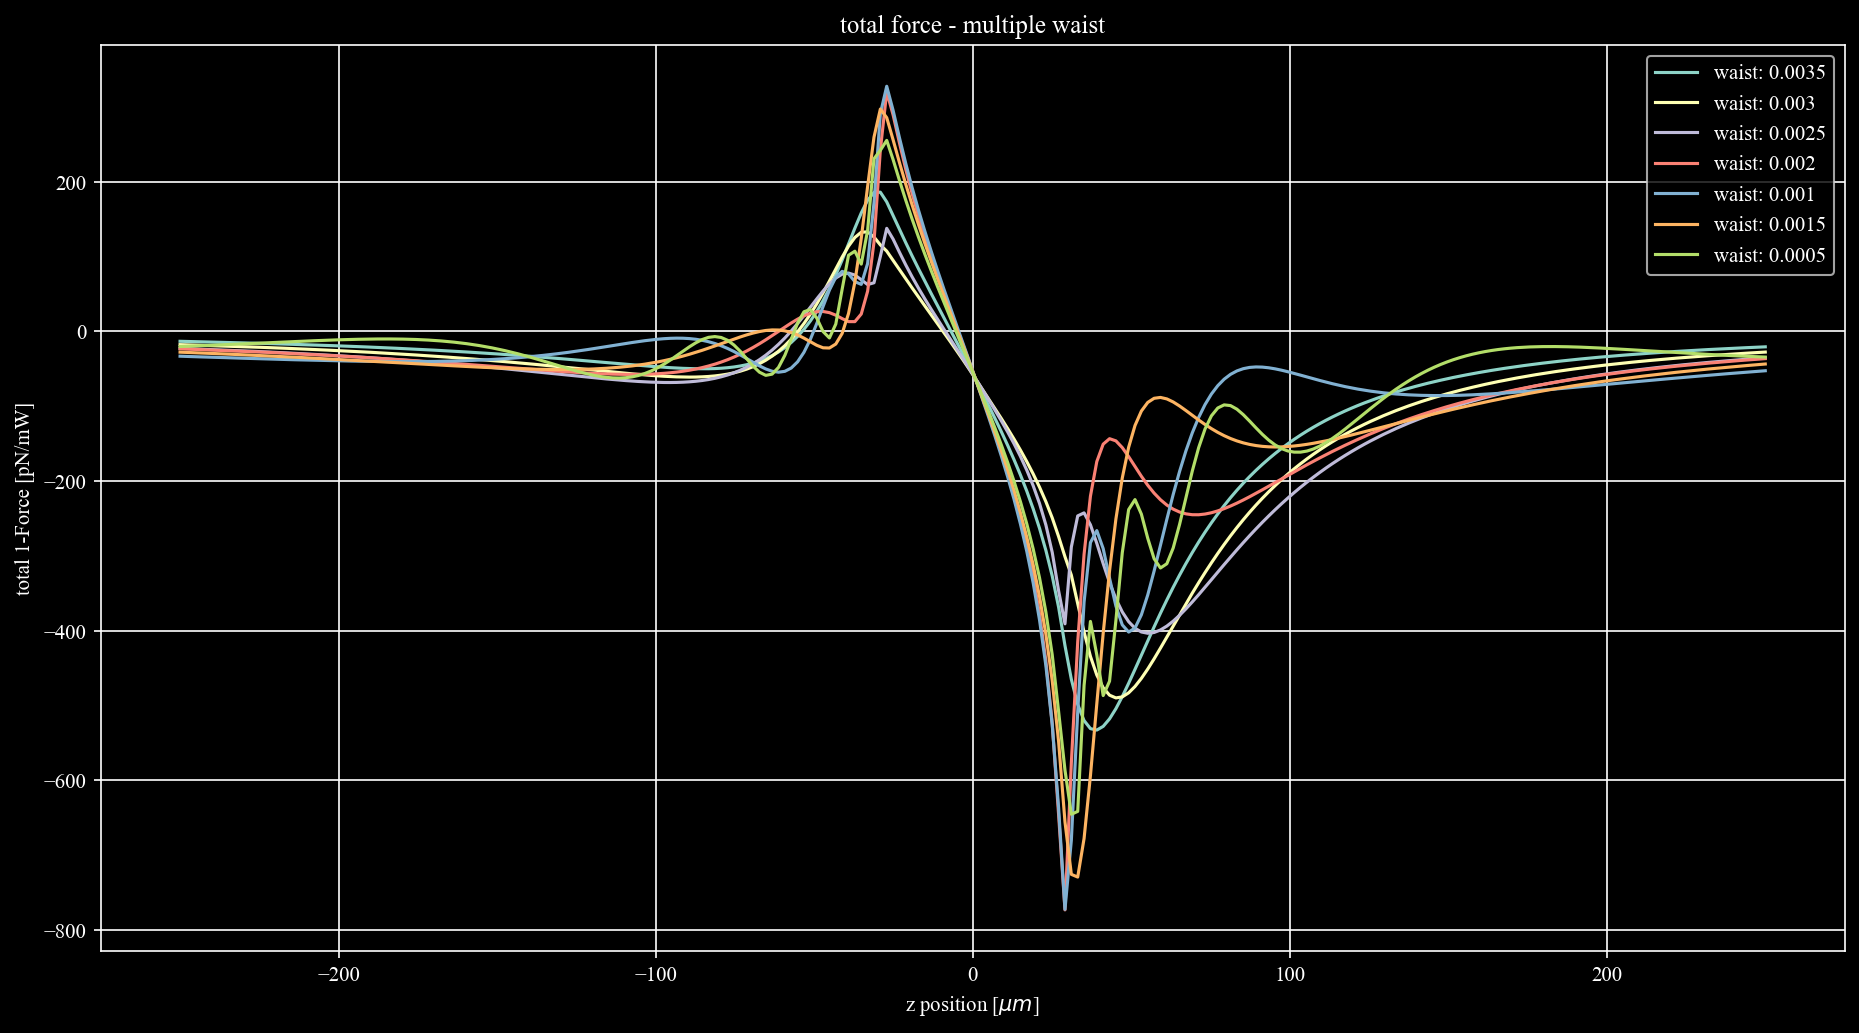

In [77]:
b_exp_1_1_3.plot_simulation(orientation='up')

#### 1.2.4 a: 50 $\mu m$

In [116]:
a = 50e-6
# Models creations
b_exp_1_1_4 = OpticRTX('waist',structure='Bessel' ,R=R,a=a,PL=PL, W=W_B_1,n_points=250)

RTXModel_structure-Bessel_aberration-False


In [117]:
b_exp_1_1_4.simulation()

No. cores: 12
Creating job instances
Initial waist ?2.6
Final waist ?3.4
waist delta ?0.2
How many radii should the particle move?10
Where is the particle moving (x, z, xz) ?z
Start at z eq. (yes/no) ?no

Simulation started...
Selected parameters...
waist [2.6, 3.4] 
Moving along: z
Execute jobs
Working....
Done!
Simulation for waist: [0.0028000000000000004, 0.0032000000000000006, 0.0030000000000000005, 0.0026000000000000003]
Saved as: waist_Bessel-simulations_m-z_p-(2.6,3.4)_eq-no.json


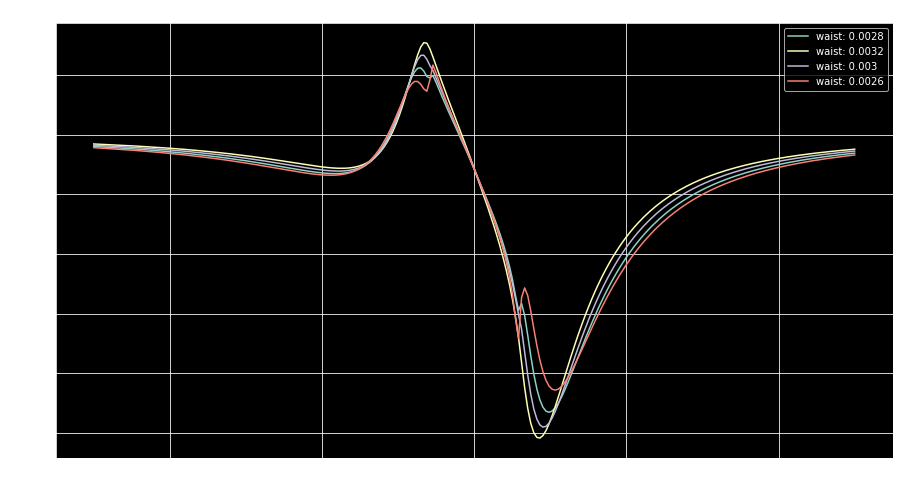

In [158]:
b_exp_1_1_4.plot_simulation(orientation='up')
plt.grid()

###  2.1 Gaussian: NA & $w_0$

#### 2.1.1 NA: 0.5

In [8]:
# Basic parameter definition
NA = 0.5
a = 20e-6 
# Models creations
g_exp_2_1 = OpticRTX('waist',structure='Gaussian' ,R=R,a=a,PL=PL,NA=NA,n_points=250)
g_exp_2_1.param

RTXModel_structure-Gaussian_aberration-False


{'a': 2e-05,
 'NA': 0.5,
 'R': 0.0033,
 'n_o': 1.51,
 'material': 'glass',
 'medium': 'water',
 'lambda': 532,
 'W': 0.008,
 'PL': 0.1,
 'n_points': 250,
 'n_t': 1.5,
 'n_i': 1.333,
 'f': 0.009966,
 'theta_crit': 0.3374964624625465}

In [9]:
g_exp_2_1.simulation()

No. cores: 12
Creating job instances


Initial waist ? 2.5
Final waist ? 4
waist delta ? 0.5
How many radii should the particle move? 10
Where is the particle moving (x, z, xz) ? z
Start at z eq. (yes/no) ? no
Additional name for file (yes/no) ? NA-0_5



Simulation started...
Selected parameters...
waist [2.5, 4.0] 
Moving along: z
Execute jobs
Working....
Done!
Simulation for waist: [0.0017677669529663688, 0.002121320343559643, 0.0024748737341529162]
Saved as: waist_Gaussian-simulations_m-z_p-(2.5,4.0)_eq-no.json


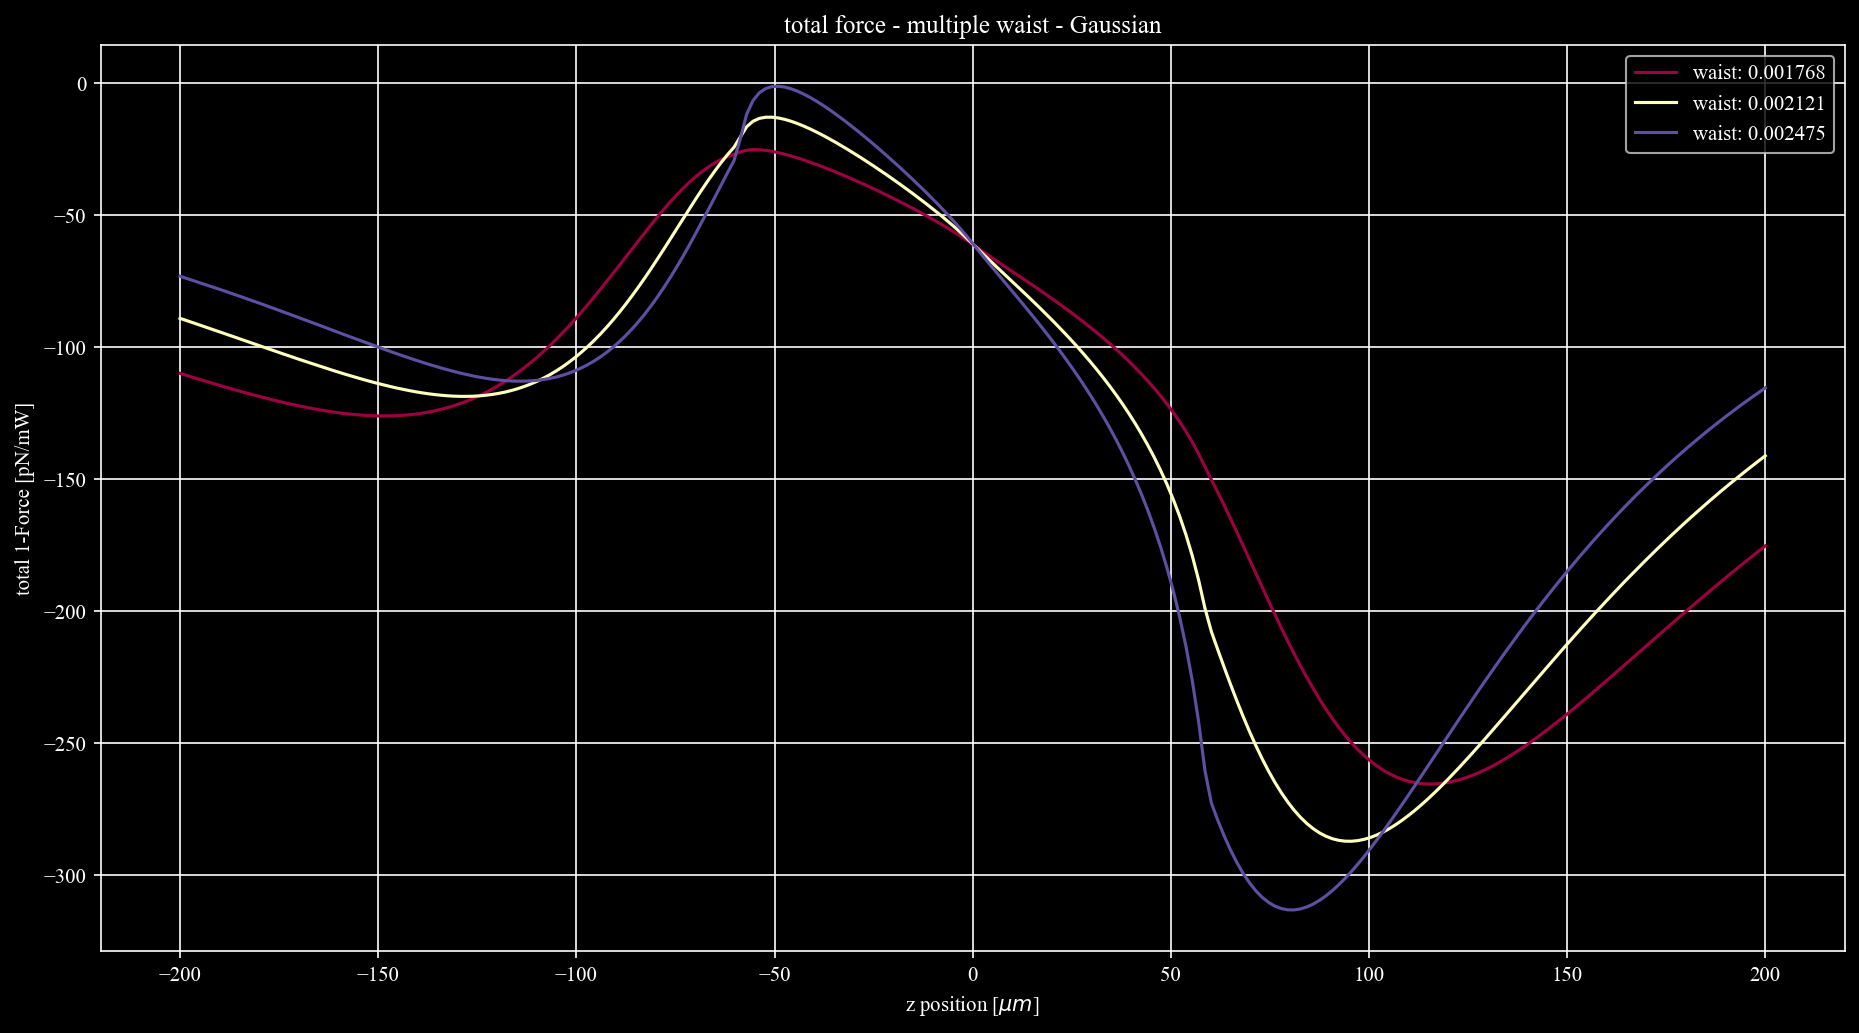

In [10]:
g_exp_2_1.plot_simulation(orientation='up')

#### 2.1.2 NA: 0.75

In [15]:
# Basic parameter definition
NA = 0.75
a = 20e-6 
# Models creations
g_exp_2_2 = OpticRTX('waist',structure='Gaussian' ,R=R,a=a,PL=PL,NA=NA,n_points=250)

RTXModel_structure-Gaussian_aberration-False


In [16]:
g_exp_2_2.simulation()

No. cores: 12
Creating job instances


Initial waist ? 3
Final waist ? 4
waist delta ? 0.5
How many radii should the particle move? 10
Where is the particle moving (x, z, xz) ? z
Start at z eq. (yes/no) ? no
Additional name for file (yes/no) ? yes
Additional name? NA-0_75



Simulation started...
Selected parameters...
waist [3.0, 4.0] 
Moving along: z
Execute jobs
Working....
Done!
Simulation for waist: [0.002121320343559643, 0.0024748737341529162]
Saved as: waist_Gaussian-simulations_m-z_p-(3.0,4.0)_eq-no_NA-0_75.json


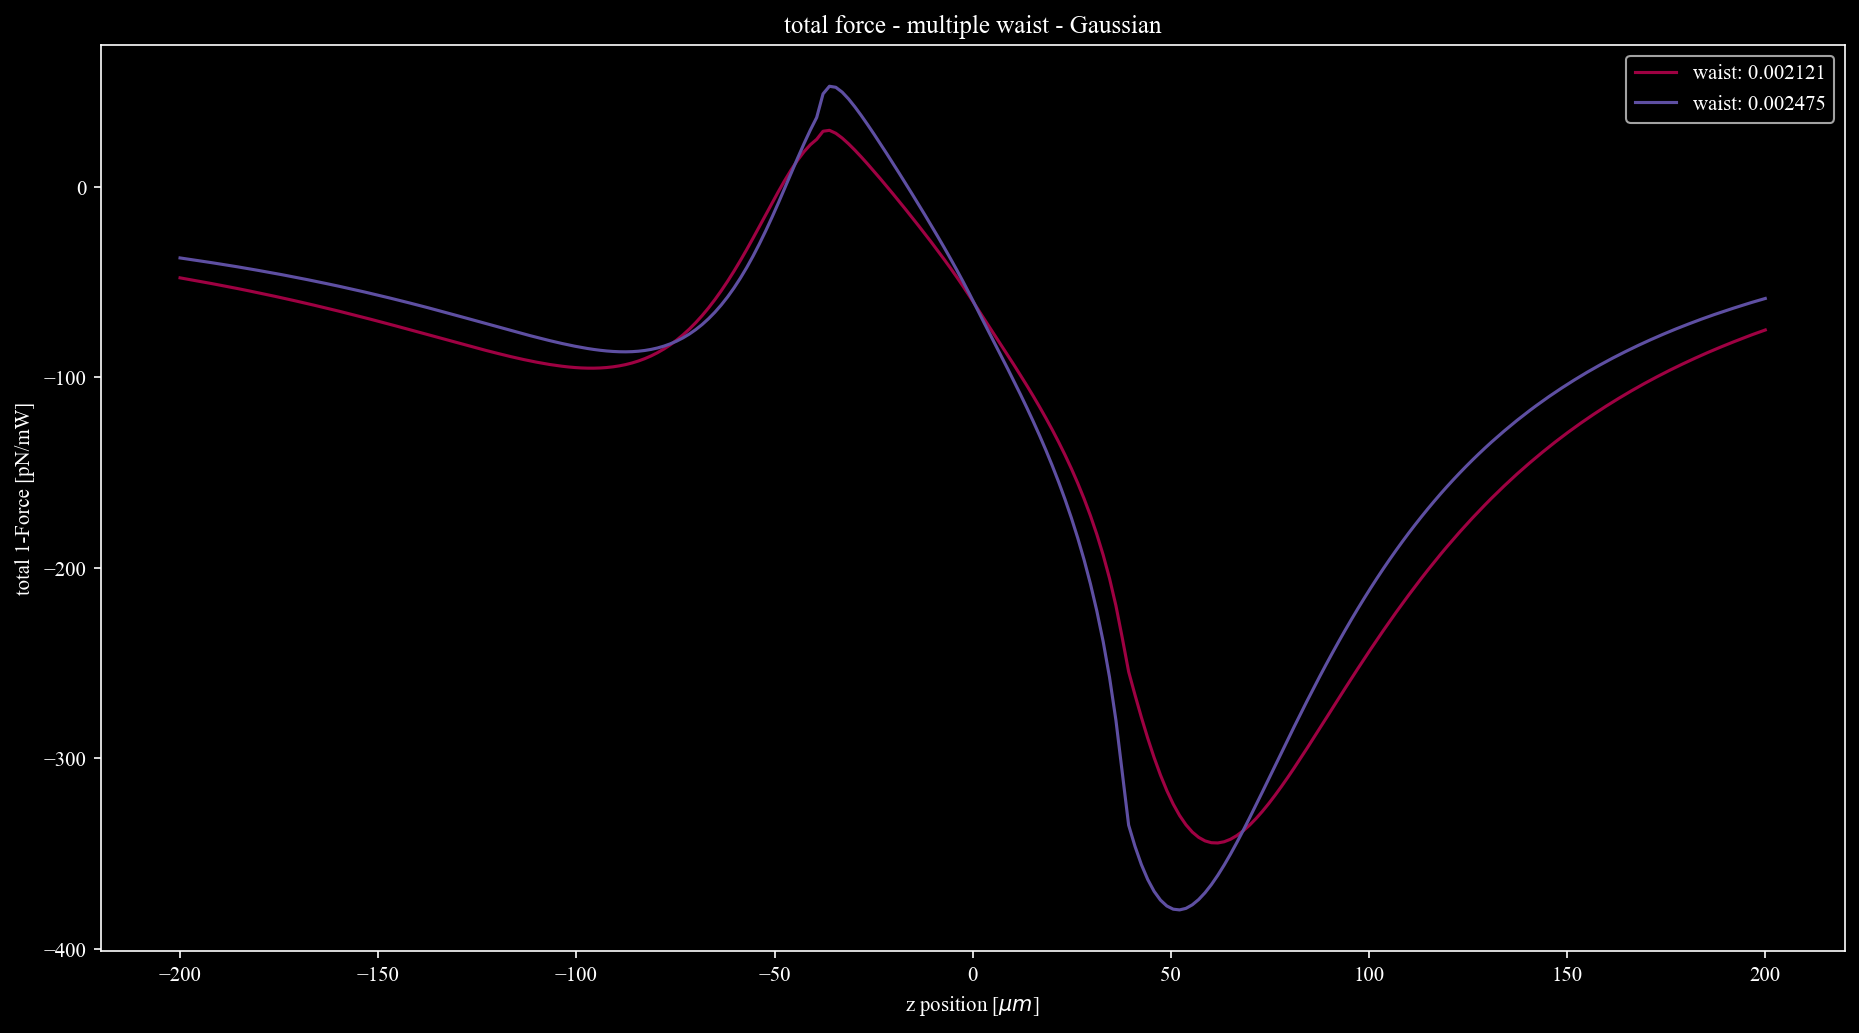

In [17]:
g_exp_2_2.plot_simulation(orientation='up')

#### 2.1.3 NA: 1.0

In [104]:
# Basic parameter definition
NA = 1.0
a = 20e-6 
# Models creations
g_exp_2_3 = OpticRTX('waist',structure='Gaussian' ,R=R,a=a,PL=PL,NA=NA,n_points=250)

RTXModel_structure-Gaussian_aberration-False


In [109]:
g_exp_2_3.simulation()

No. cores: 12
Creating job instances
Initial waist ?1
Final waist ?3.5
waist delta ?0.5
How many radii should the particle move?10
Where is the particle moving (x, z, xz) ?z
Start at z eq. (yes/no) ?no

Simulation started...
Selected parameters...
waist [1.0, 3.5] 
Moving along: z
Execute jobs
Working....
Done!
Simulation for waist: [0.001, 0.0015, 0.002, 0.0025, 0.003]
Saved as: waist_Gaussian-simulations_m-z_p-(1.0,3.5)_eq-no.json


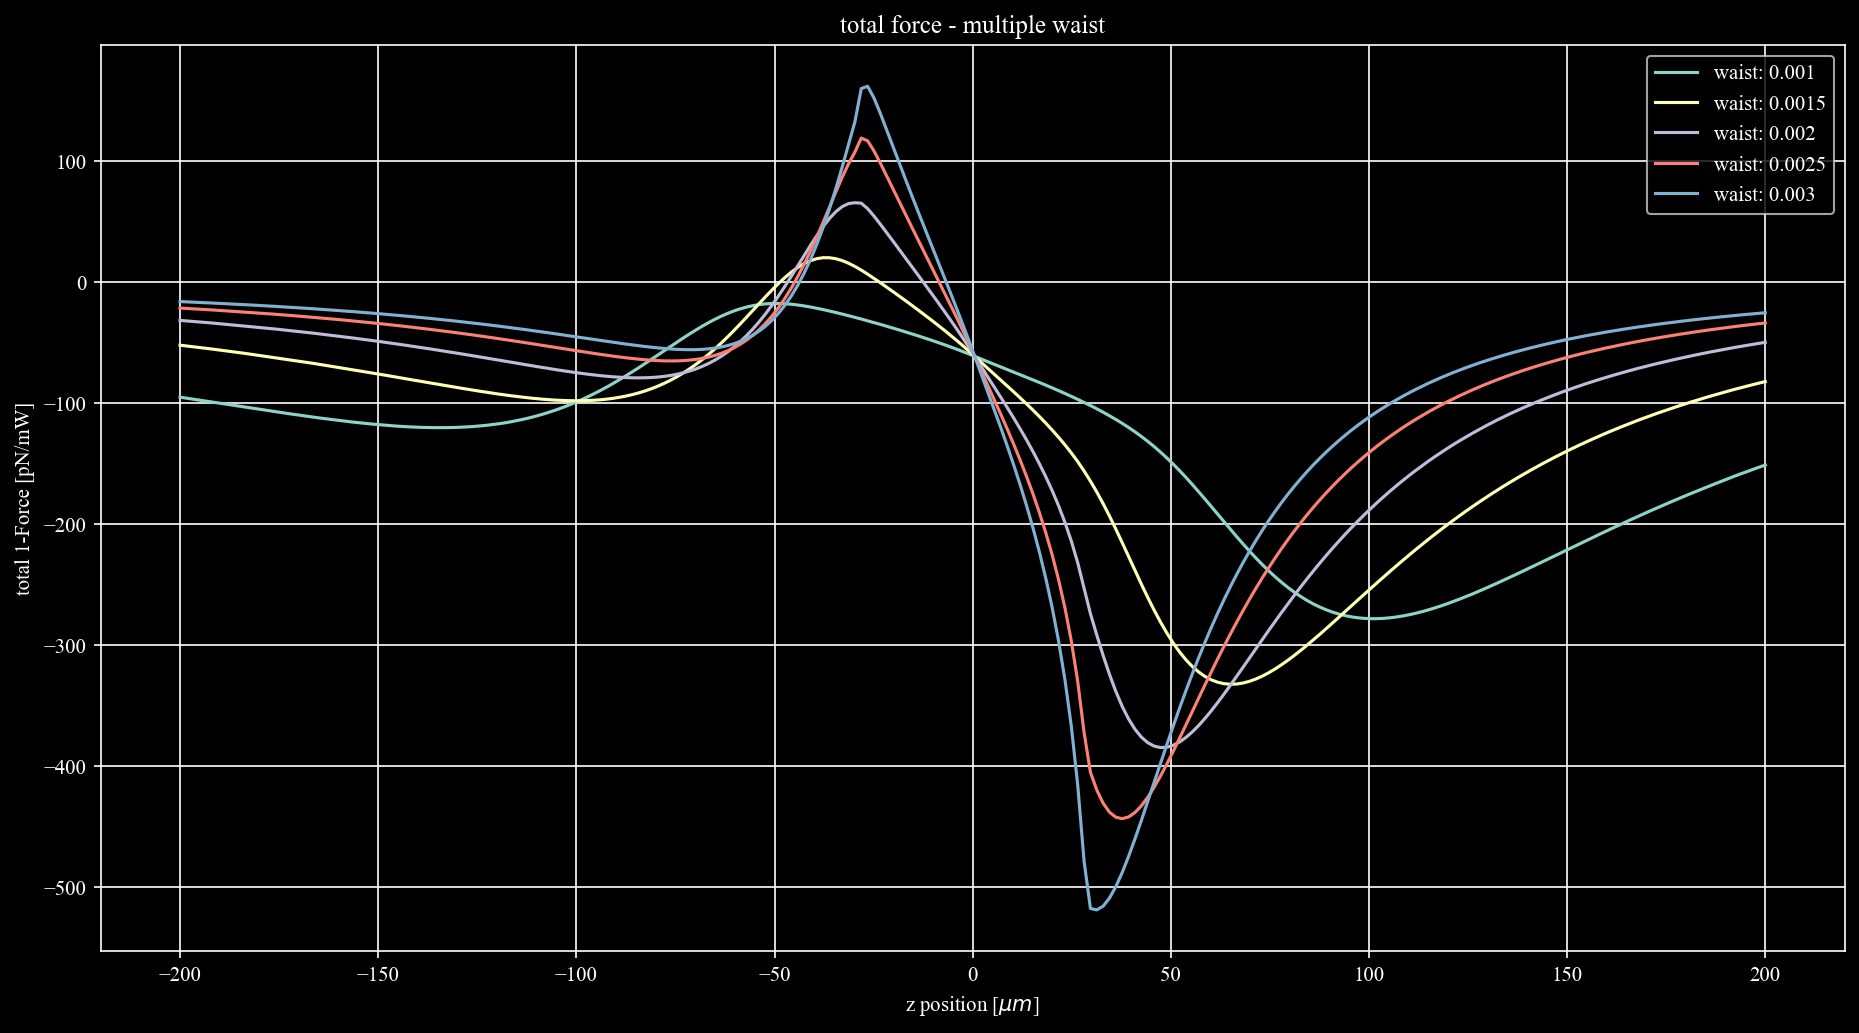

In [110]:
g_exp_2_3.plot_simulation(orientation='up')

#### 2.1.4 NA: 1.5

In [96]:
# Basic parameter definition
NA = 1.5
a = 20e-6 
# Models creations
g_exp_2_4 = OpticRTX('waist',structure='Gaussian' ,R=R,a=a,PL=PL,NA=NA,n_points=250)

RTXModel_structure-Gaussian_aberration-False


In [97]:
g_exp_2_4.simulation()

No. cores: 12
Creating job instances
Initial waist ?0.5
Final waist ?4
waist delta ?0.5
How many radii should the particle move?10
Where is the particle moving (x, z, xz) ?z
Start at z eq. (yes/no) ?no

Simulation started...
Selected parameters...
waist [0.5, 4.0] 
Moving along: z
Execute jobs
Working....
Done!
Simulation for waist: [0.0005, 0.001, 0.0015, 0.002, 0.0025, 0.003, 0.0035]
Saved as: waist_Gaussian-simulations_m-z_p-(0.5,4.0)_eq-no.json


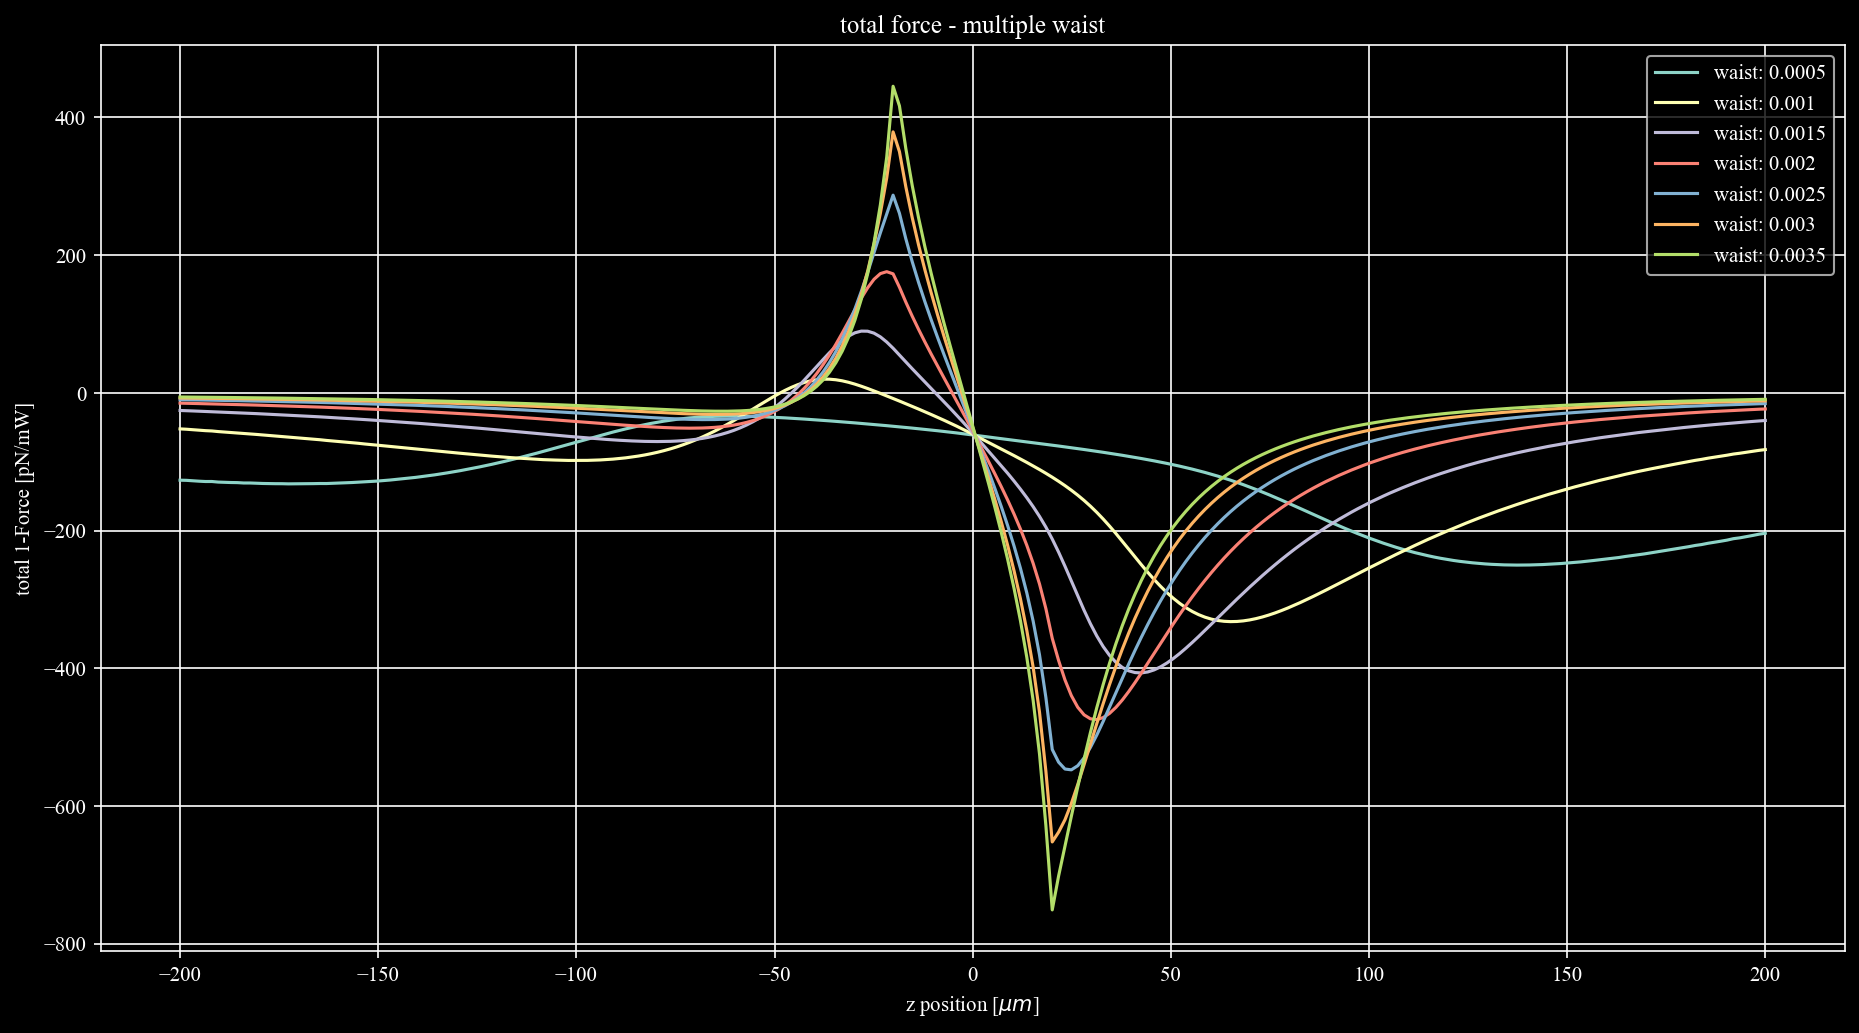

In [98]:
g_exp_2_4.plot_simulation(orientation='up')

###  2.2 Bessel: NA & $\rho_B$

#### 2.2.1 NA: 0.5

In [93]:
# Basic parameter definition
NA = 0.5
a = 20e-6 
# Models creations
b_exp_2_1 = OpticRTX('waist',structure='Bessel' ,R=R,a=a,PL=PL,NA=NA,n_points=250)

RTXModel_structure-Bessel_aberration-False


In [94]:
b_exp_2_1.simulation()

No. cores: 12
Creating job instances
Initial waist ?0.5
Final waist ?4
waist delta ?0.5
How many radii should the particle move?10
Where is the particle moving (x, z, xz) ?z
Start at z eq. (yes/no) ?no

Simulation started...
Selected parameters...
waist [0.5, 4.0] 
Moving along: z
Execute jobs
Working....
Done!
Simulation for waist: [0.0035, 0.003, 0.0025, 0.0015, 0.001, 0.002, 0.0005]
Saved as: waist_Bessel-simulations_m-z_p-(0.5,4.0)_eq-no.json


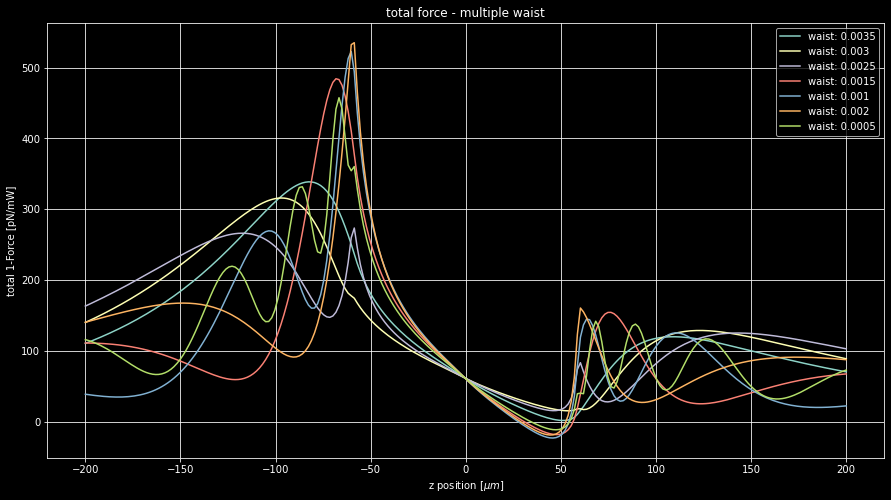

In [159]:
plt.style.use('dark_background')
b_exp_2_1.plot_simulation(orientation='down')

#### 2.2.2 NA: 0.75

In [105]:
# Basic parameter definition
NA = 0.75
a = 20e-6 
# Models creations
b_exp_2_2 = OpticRTX('waist',structure='Bessel' ,R=R,a=a,PL=PL,NA=NA,n_points=250)

RTXModel_structure-Bessel_aberration-False


In [111]:
b_exp_2_2.simulation()

No. cores: 12
Creating job instances
Initial waist ?0.5
Final waist ?4
waist delta ?0.5
How many radii should the particle move?10
Where is the particle moving (x, z, xz) ?z
Start at z eq. (yes/no) ?no

Simulation started...
Selected parameters...
waist [0.5, 4.0] 
Moving along: z
Execute jobs
Working....
Done!
Simulation for waist: [0.003, 0.0025, 0.002, 0.0035, 0.0015, 0.001, 0.0005]
Saved as: waist_Bessel-simulations_m-z_p-(0.5,4.0)_eq-no.json


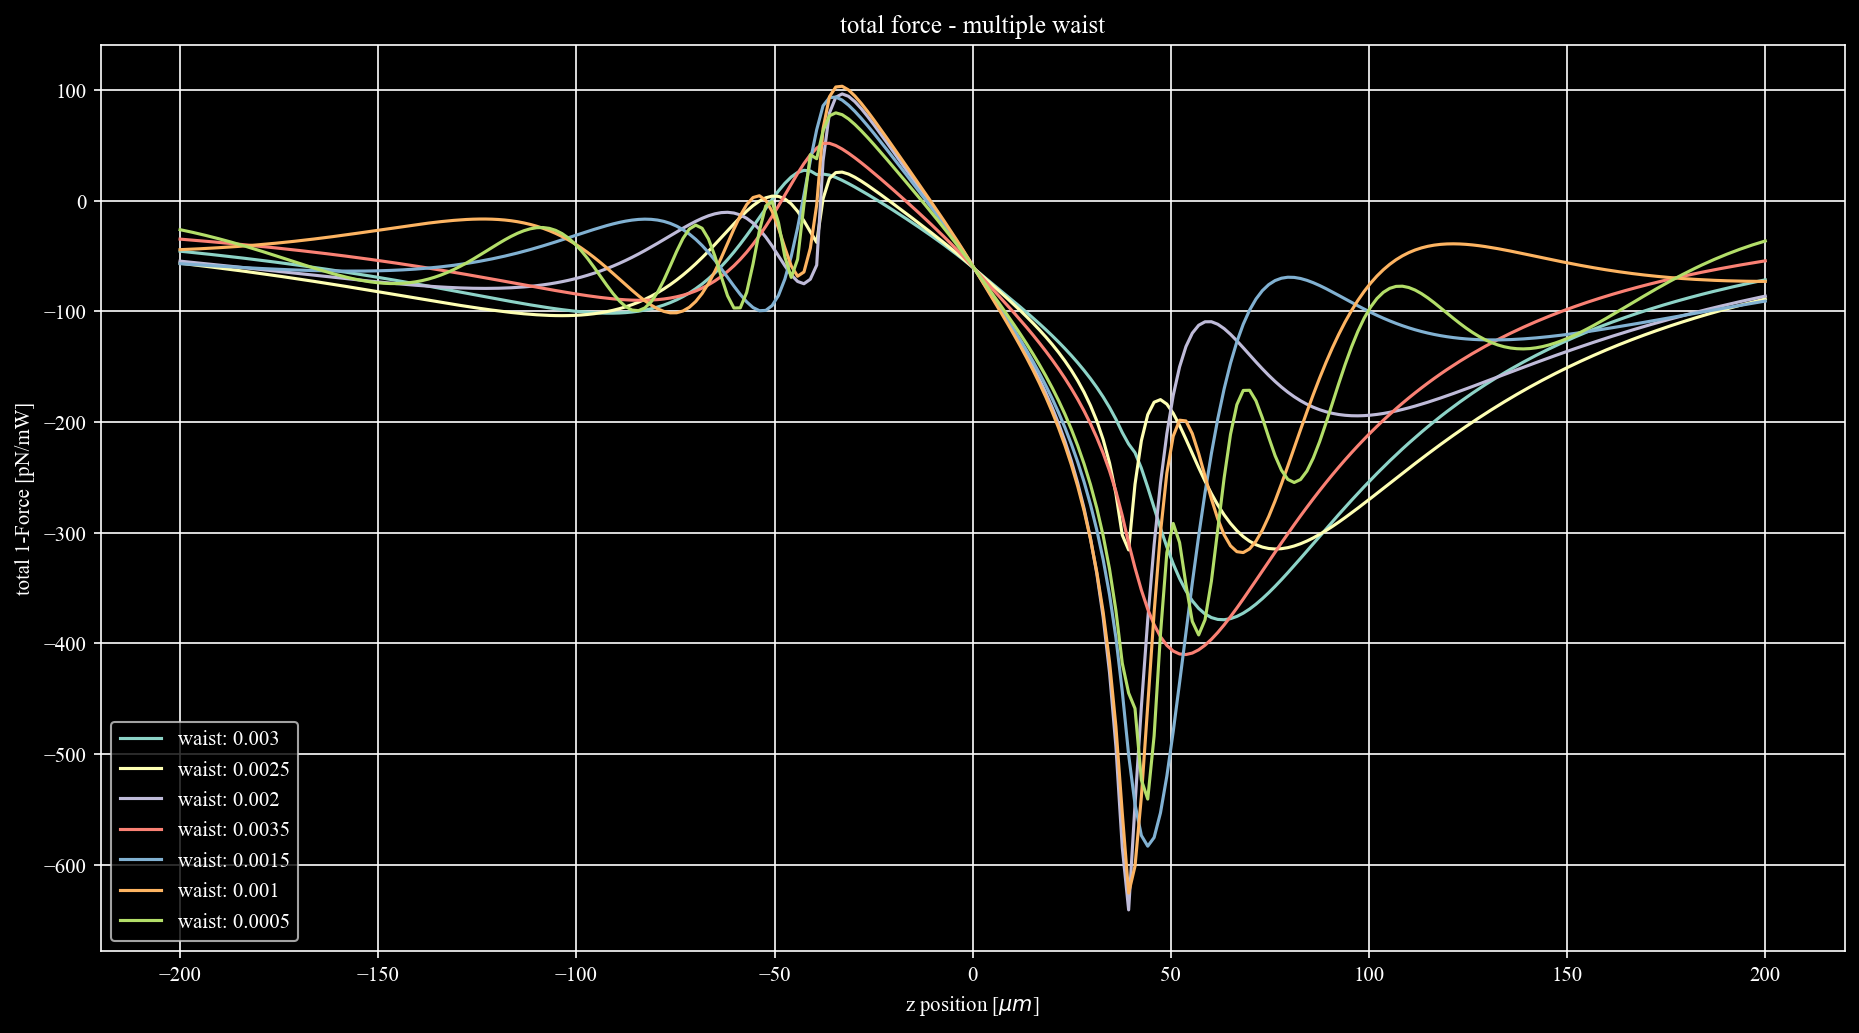

In [112]:
b_exp_2_2.plot_simulation(orientation='up')

#### 2.2.3 NA: 1.0

In [106]:
# Basic parameter definition
NA = 1.0
a = 20e-6 
# Models creations
b_exp_2_3 = OpticRTX('waist',structure='Bessel' ,R=R,a=a,PL=PL,NA=NA,n_points=250)

RTXModel_structure-Bessel_aberration-False


In [113]:
b_exp_2_3.simulation()

No. cores: 12
Creating job instances
Initial waist ?0.5
Final waist ?4
waist delta ?0.5
How many radii should the particle move?10
Where is the particle moving (x, z, xz) ?z
Start at z eq. (yes/no) ?no

Simulation started...
Selected parameters...
waist [0.5, 4.0] 
Moving along: z
Execute jobs
Working....
Done!
Simulation for waist: [0.0015, 0.0025, 0.003, 0.0035, 0.002, 0.001, 0.0005]
Saved as: waist_Bessel-simulations_m-z_p-(0.5,4.0)_eq-no.json


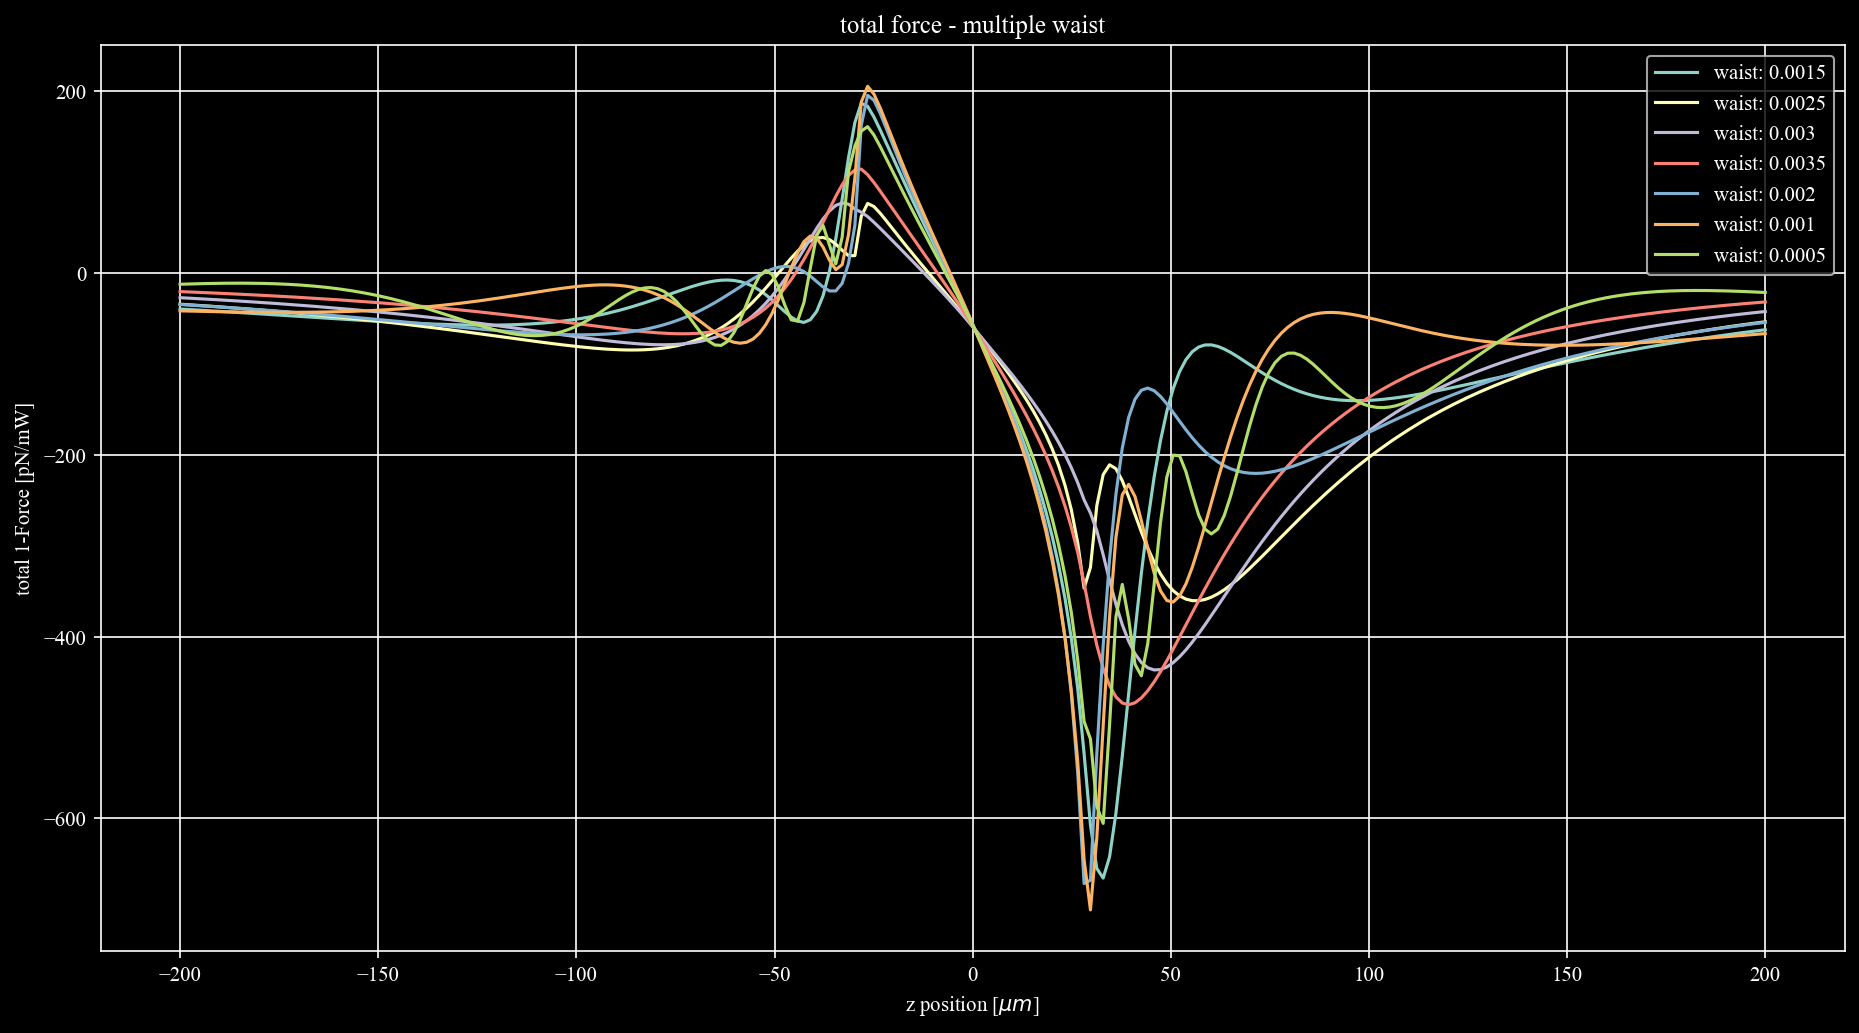

In [114]:
b_exp_2_3.plot_simulation(orientation='up')

#### 2.2.4 NA: 1.5

In [99]:
# Basic parameter definition
NA = 1.5
a = 20e-6 
# Models creations
b_exp_2_4 = OpticRTX('waist',structure='Bessel' ,R=R,a=a,PL=PL,NA=NA,n_points=250)

RTXModel_structure-Bessel_aberration-False


In [100]:
b_exp_2_4.simulation()

No. cores: 12
Creating job instances
Initial waist ?0.5
Final waist ?4
waist delta ?0.5
How many radii should the particle move?10
Where is the particle moving (x, z, xz) ?z
Start at z eq. (yes/no) ?no

Simulation started...
Selected parameters...
waist [0.5, 4.0] 
Moving along: z
Execute jobs
Working....
Done!
Simulation for waist: [0.0015, 0.0025, 0.002, 0.003, 0.001, 0.0005, 0.0035]
Saved as: waist_Bessel-simulations_m-z_p-(0.5,4.0)_eq-no.json


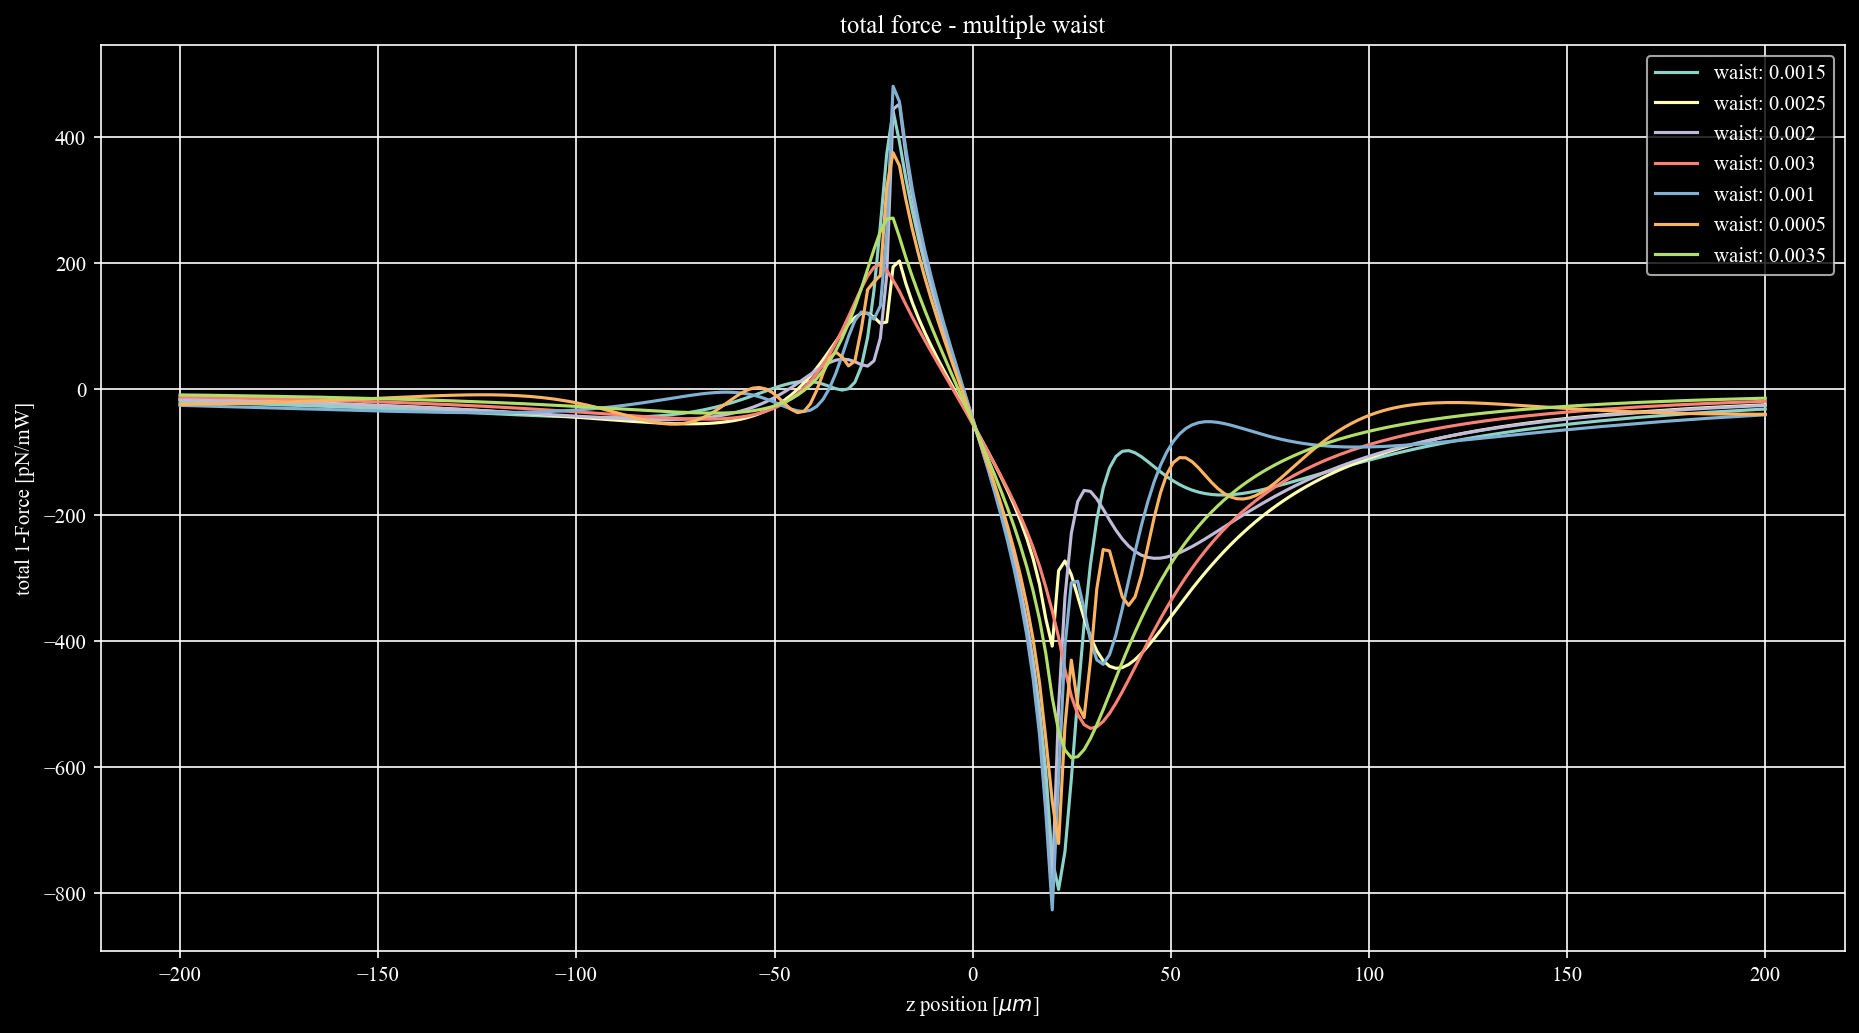

In [101]:
b_exp_2_4.plot_simulation(orientation='up')